# Netflix - TV Shows and Movies

## Overview

This project involves using Big Data technologies to analyze and build machine learning models using a large dataset (assuming the dataset is large). The project utilizes Hadoop and Spark for loading and processing data, MongoDB for the data warehouse, and HDFS for the data lake.

**Data**

The project starts with a large data source, which could be a CSV file or any other file format. The data is loaded into the Hadoop Distributed File System (HDFS) to ensure scalable storage.

**Sandbox**

The next step is to create a sandbox environment using Hadoop and Spark. The data is loaded into MongoDB to ensure scalability through a Big Data architecture.

**Exploratory Data Analysis**

The sandbox environment is then used for exploratory data analysis with standard libraries to analyze the dataset, perform feature selection, and build ML models.

**Validation of Results**

Finally, the results obtained in the sandbox environment are validated in a broader Big Data context using Spark ML. This allows us to verify the reliability and generalizability of the results obtained in the preliminary analyses.


## About Dataset

This dataset was developed to catalog all the shows available on the Netflix streaming platform and to facilitate data analysis in order to uncover interesting insights. The data, which includes specific information for the United States, was collected in July 2022.

This dataset contains two files: one with the titles ('titles.csv') and one with the cast information ('credits.csv') for each title.

The **'titles.csv'** dataset includes over unique titles on Netflix, described in 15 columns containing various details about each title:

- **id**: The title ID on JustWatch.
- **title**: The name of the title.
- **show_type**: TV show or movie.
- **description**: A brief description.
- **release_year**: The year of release.
- **age_certification**: The age certification.
- **runtime**: The duration of the episode (SHOW) or movie.
- **genres**: A list of genres.
- **production_countries**: A list of countries that produced the title.
- **seasons**: Number of seasons if it is a SHOW.
- **imdb_id**: The title ID on IMDB (Internet Movie Database).
- **imdb_score**: IMDB score.
- **imdb_votes**: IMDB votes.
- **tmdb_popularity**: Popularity on TMDB.
- **tmdb_score**: Score on TMDB (The Movie Database).

The **'credits.csv'** dataset includes details on actors and director credits associated with Netflix titles, organized into five columns containing various information about each credit:

- **person_ID**: The person's ID on JustWatch.
- **id**: The title ID on JustWatch.
- **name**: The name of the actor or director.
- **character_name**: The name of the character.
- **role**: ACTOR or DIRECTOR.

## Hypothesis
Our analysis will be conducted by testing and attempting to refute the following hypotheses:

- **H1.** Movies with longer durations tend to have higher scores. 

- **H2.** Movies with larger casts are generally rated higher. 

- **H3.** Movies that include specific genres (e.g., action or drama) perform better in terms of scores. 

- **H4.** Movies with more restrictive age certifications have higher scores. 

- **H5.** Movies produced in multiple countries tend to have higher scores. 

- **H6.** More recent movies have different rating trends compared to older movies, with possible annual variations. 

- **H7.** The presence of certain keywords in the titles of Netflix movies is positively correlated with the success of the movie, measured based on the average score between IMDB and TMDB. 

- **H8.** The characteristics of a movie (duration, genre, age certification, number of actors, IMDb score, popularity on TMDB, etc.) can be used to predict whether a movie will be successful.

All hypotheses are falsifiable with our dataset.

## Metrics

To demonstrate or refute our hypotheses, we can propose the following metrics:

* **Runtime:** The duration of a movie in minutes. This metric is related to H1.

* **Average_Score:** The average score of movies. It is connected to H1 and H4.

* **Cast_size:** The number of main actors in a movie. It is connected to H2.

* **TMDB_Popularity:** The measure of a movie's popularity on TMDB. It is connected to H2, H3, H5, and H6.

* **Genre:** The genre or genres associated with a movie (action, drama, etc.). It is connected to H3.

* **Age_Certification:** The age classification (G, PG, PG-13, R, NC-17) of a movie. It is connected to H4.

* **Num_Production_Countries:** The number of countries involved in the production of a movie. It is connected to H5.

* **Release_Year:** The year in which a movie was released. It is connected to H6.

* **Count_word:** Identified keywords in the titles of Netflix movies. It is connected to H7.

* **Success:** The success metric (successful) indicates whether a movie is considered a success or not. This variable was used as the target in our classification analyses.

These metrics will help in systematically analyzing the data to test our hypotheses.


## Load data into Hadoop hdfs

##### Load the  titles.csv into HDFS
hadoop fs -put /home/datascience/titles.csv /user/datascience/datasets/

##### Load the file credits.csv into HDFS
hadoop fs -put /home/datascience/credits.csv /user/datascience/datasets/


In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, coalesce, when, lit, size, sum, count as pyspark_count
from pyspark.sql.types import IntegerType, DoubleType


In [2]:
spark = SparkSession.builder \
    .appName("NetflixDataAnalysis") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1:27017/dataset?authSource=admin") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1:27017/dataset?authSource=admin") \
    .getOrCreate()

24/06/25 10:01:24 WARN Utils: Your hostname, ubuntu resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/06/25 10:01:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/usr/local/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/datascience/.ivy2/cache
The jars for the packages stored in: /home/datascience/.ivy2/jars
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-34213e8e-ec5d-4e39-abeb-eeb047132829;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 3747ms :: artifacts dl 498ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||

In [3]:
# Check the active sessions

active_session = SparkSession.builder.getOrCreate()
active_session

In [4]:
# Specifying file path and reading to HDFs

path_titles = "hdfs://localhost:54310/user/datascience/datasets/titles.csv"
path_credits = "hdfs://localhost:54310/user/datascience/datasets/credits.csv"

df_titles = spark.read.option("header", "true").csv(path_titles)
df_credits = spark.read.option("header", "true").csv(path_credits)


In [5]:
# display the dataframe shape 

num_rows_titles = df_titles.count()
num_columns_titles = len(df_titles.columns)

num_rows_credits = df_credits.count()
num_columns_credits = len(df_credits.columns)



print("df_titles Shape: (Rows: {}, Columns: {})".format(num_rows_titles, num_columns_titles))
print("df_credits Shape: (Rows: {}, Columns: {})".format(num_rows_credits, num_columns_credits))

df_titles Shape: (Rows: 5929, Columns: 15)
df_credits Shape: (Rows: 77801, Columns: 5)


In [6]:
df_titles.show(5)
df_titles.printSchema()

+--------+--------------------+-----+--------------------+------------+-----------------+-------+--------------------+--------------------+-------+---------+----------+----------+---------------+----------+
|      id|               title| type|         description|release_year|age_certification|runtime|              genres|production_countries|seasons|  imdb_id|imdb_score|imdb_votes|tmdb_popularity|tmdb_score|
+--------+--------------------+-----+--------------------+------------+-----------------+-------+--------------------+--------------------+-------+---------+----------+----------+---------------+----------+
|ts300399|Five Came Back: T...| SHOW|"This collection ...|        1945|            TV-MA|     51|   ['documentation']|              ['US']|    1.0|     null|      null|      null|            0.6|      null|
| tm84618|         Taxi Driver|MOVIE|A mentally unstab...|        1976|                R|    114|  ['drama', 'crime']|              ['US']|   null|tt0075314|       8.2|  80

In [7]:
df_credits.show(5)
df_credits.printSchema()

+---------+-------+---------------+--------------------+-----+
|person_id|     id|           name|           character| role|
+---------+-------+---------------+--------------------+-----+
|     3748|tm84618| Robert De Niro|       Travis Bickle|ACTOR|
|    14658|tm84618|   Jodie Foster|       Iris Steensma|ACTOR|
|     7064|tm84618|  Albert Brooks|                 Tom|ACTOR|
|     3739|tm84618|  Harvey Keitel|Matthew 'Sport' H...|ACTOR|
|    48933|tm84618|Cybill Shepherd|               Betsy|ACTOR|
+---------+-------+---------------+--------------------+-----+
only showing top 5 rows

root
 |-- person_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- character: string (nullable = true)
 |-- role: string (nullable = true)



Columns such as "release_year," "runtime," "imdb_score," "imdb_votes," "tmdb_popularity," and "tmdb_score" appear to be read as strings instead of numbers. We proceed by converting them to the appropriate data types.

In [8]:
df_titles = df_titles.withColumn("release_year", df_titles["release_year"].cast(IntegerType()))
df_titles = df_titles.withColumn("runtime", df_titles["runtime"].cast(IntegerType()))
df_titles = df_titles.withColumn("imdb_score", df_titles["imdb_score"].cast(DoubleType()))
df_titles = df_titles.withColumn("imdb_votes", df_titles["imdb_votes"].cast(IntegerType()))
df_titles = df_titles.withColumn("tmdb_popularity", df_titles["tmdb_popularity"].cast(DoubleType()))
df_titles = df_titles.withColumn("tmdb_score", df_titles["tmdb_score"].cast(DoubleType()))


df_titles.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- age_certification: string (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- seasons: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- imdb_score: double (nullable = true)
 |-- imdb_votes: integer (nullable = true)
 |-- tmdb_popularity: double (nullable = true)
 |-- tmdb_score: double (nullable = true)



### Visualizzazione Output Mapreducer

hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.10.0.jar \
    -files /home/datascience/ netflix_mapper.py,/home/datascience/ netflix_reducer.py\
    -mapper " wordcount_mapper.py" \
    -reducer " wordcount_reducer.py" \
    -input /user/datascience/datasets/titles.csv \
    -output /user/datascience/output/wordcount


In [9]:
# Reading the output of the MapReduce job
df_word_counts = spark.read.option("delimiter", "\t").csv("/user/datascience/output/countword/part-*", schema="word STRING, count INT")

# Sort the DataFrame by 'count' in descending order
df_word_counts_sorted = df_word_counts.orderBy(col('count').desc())
df_word_counts_sorted.show(10)

+---------+-----+
|     word|count|
+---------+-----+
|        s|  182|
|     love|  128|
|        2|   71|
|christmas|   71|
|     life|   58|
|      one|   52|
|    movie|   49|
|    story|   47|
|      man|   46|
|    world|   45|
+---------+-----+
only showing top 10 rows



## Data Cleaning

### Duplicate values 

In [10]:
# Checking for duplicates in df_titles.

duplicati_titles = df_titles.agg({"id": "count"}).collect()[0][0] - df_titles.distinct().count()
print(f"Number of duplicates found in df_titles: {duplicati_titles}")

Number of duplicates found in df_titles: 0


In [11]:
# Checking for duplicates in df_credits

duplicati_credits = df_credits.agg({"id": "count"}).collect()[0][0] - df_credits.distinct().count()
print(f"Number of duplicates found in df_credits: {duplicati_credits}")

Number of duplicates found in df_credits: 0


In [ ]:
# Remove duplicates in df_credits.
#df_credits = df_credits.dropDuplicates()

In [ ]:
duplicati_credits_post = df_credits.agg({"id": "count"}).collect()[0][0] - df_credits.distinct().count()
print(f"Number of duplicates remaining in df_credits: {duplicati_credits_post}")

### Missing values 

In [12]:
def missing_value(df):
    null_counts = df.select([pyspark_count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    null_counts_list = null_counts.collect()[0].asDict()

    for column, count in null_counts_list.items():
        print(f"{column}: {count}")


print("Null values in  df_titles:")
missing_value(df_titles)
print("Null values in df_credits:")
missing_value(df_credits)


Null values in  df_titles:


id: 0
title: 3
type: 18
description: 40
release_year: 324
age_certification: 2594
runtime: 291
genres: 97
production_countries: 96
seasons: 3684
imdb_id: 541
imdb_score: 737
imdb_votes: 677
tmdb_popularity: 289
tmdb_score: 458
Null values in df_credits:


person_id: 0
id: 0
name: 0
character: 9772
role: 0


For handling missing data in the **df_titles** dataset, we have adopted several specific strategies to ensure the integrity and utility of the data:

- The columns **'title', 'type', 'release_year', 'genres', 'production_countries', 'imdb_id', 'runtime'** contain information that cannot be easily imputed without introducing significant bias or altering the reality of the data. Therefore, we opted for a conservative removal strategy to ensure that subsequent analyses are based on a dataset that is as complete and representative as possible.

In [14]:
df_titles = df_titles.na.drop(subset=['title', 'type', 'release_year', 'genres', 'production_countries', 'imdb_id', 'runtime'])
null_counts_after_cleanup = df_titles.select([count(when(col(c).isNull(), c)).alias(c) for c in ['title', 'type', 'release_year', 'genres', 'production_countries', 'imdb_id', 'runtime']])
print("Counts of null values after removing the rows:")
null_counts_after_cleanup.show()

Counts of null values after removing the rows:


+-----+----+------------+------+--------------------+-------+-------+
|title|type|release_year|genres|production_countries|imdb_id|runtime|
+-----+----+------------+------+--------------------+-------+-------+
|    0|   0|           0|     0|                   0|      0|      0|
+-----+----+------------+------+--------------------+-------+-------+



- **"Description":**
For missing values in "description", we imputed the text "No description available".

In [15]:
df_titles = df_titles.na.fill({'description': 'No description available'})
null_count_description = df_titles.select(count(when(col("description").isNull(), 1)).alias("Null Count in Description"))
print("check null values:")
null_count_description.show()

check null values:


+-------------------------+
|Null Count in Description|
+-------------------------+
|                        0|
+-------------------------+



- **"Age_certification"**: For missing values in "Age_certification", we imputed the text NR (Not Rated).

In [16]:
df_titles = df_titles.na.fill({'age_certification': 'NR'})

null_count_age_certification = df_titles.select(count(when(col("age_certification").isNull(), 1)).alias("Null Count in Description"))
print("check null values:")
null_count_age_certification.show()


check null values:


+-------------------------+
|Null Count in Description|
+-------------------------+
|                        0|
+-------------------------+



- **"Seasons"**: We implemented a conditional imputation for the "seasons" column. This method ensures that the values for "seasons" are set to 0 for movies, accurately reflecting their nature, while maintaining the existing number of seasons for TV shows.

In [17]:
df_titles = df_titles.withColumn("seasons", when(col("type") == "SHOW", col("seasons")).otherwise(lit(0)))
null_season = df_titles.select(count(when(col("seasons").isNull(), 1)).alias("Null Count in seasons"))
print("check null values:")
null_season.show()

check null values:


+---------------------+
|Null Count in seasons|
+---------------------+
|                    0|
+---------------------+



- missing values for **"imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"**

In [18]:
df_titles = df_titles.dropna(subset=["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"])

In [19]:
#check number of rows and columns in df_titles after cleanup

print("df_titles Shape: (Rows: {}, Columns: {})".format(df_titles.count(), len(df_titles.columns)))

df_titles Shape: (Rows: 4913, Columns: 15)


In [20]:
df_titles.show()

+--------+--------------------+-----+--------------------+------------+-----------------+-------+--------------------+--------------------+-------+---------+----------+----------+---------------+----------+
|      id|               title| type|         description|release_year|age_certification|runtime|              genres|production_countries|seasons|  imdb_id|imdb_score|imdb_votes|tmdb_popularity|tmdb_score|
+--------+--------------------+-----+--------------------+------------+-----------------+-------+--------------------+--------------------+-------+---------+----------+----------+---------------+----------+
| tm84618|         Taxi Driver|MOVIE|A mentally unstab...|        1976|                R|    114|  ['drama', 'crime']|              ['US']|      0|tt0075314|       8.2|    808582|         40.965|     8.179|
|tm154986|         Deliverance|MOVIE|Intent on seeing ...|        1972|                R|    109|['drama', 'action...|              ['US']|      0|tt0068473|       7.7|    

## Metrics Calculation

#### Cast_count

In [21]:
# Filter the data to account for non-null values in the "role" column and calculate the number of cast members for each movie
filtered_credits = df_credits.filter((col("role") == "ACTOR") & (col("role").isNotNull()))
cast_count = filtered_credits.groupBy("id").agg(count("person_id").alias("cast_size"))

# Join with the movies dataset to add the number of cast members and handle null values with coalesce function
df_titles = df_titles.join(cast_count, df_titles.id == cast_count.id, "left").drop(cast_count.id)
df_titles = df_titles.withColumn("cast_size", coalesce(col("cast_size"), col("cast_size").cast("int")).alias("cast_size").cast("int")).fillna(0, subset=["cast_size"])

# Display the first 10 rows to verify the result
df_titles.select("title", "cast_size").show(10, truncate=False)



+-------------------------------+---------+
|title                          |cast_size|
+-------------------------------+---------+
|Taxi Driver                    |36       |
|Deliverance                    |22       |
|Monty Python and the Holy Grail|46       |
|The Dirty Dozen                |54       |
|Monty Python's Flying Circus   |5        |
|Life of Brian                  |21       |
|Dirty Harry                    |57       |
|Bonnie and Clyde               |16       |
|The Blue Lagoon                |13       |
|The Guns of Navarone           |23       |
+-------------------------------+---------+
only showing top 10 rows



#### num_production_countries

In [23]:
#Calculate the number of production countries for each movie
df_titles = df_titles.withColumn("num_production_countries", size(split(col("production_countries"), ",")))
# Display the first 10 rows to verify the result
df_titles.select("title", "production_countries", "num_production_countries").show(10, truncate=False)

+-------------------------------+--------------------+------------------------+
|title                          |production_countries|num_production_countries|
+-------------------------------+--------------------+------------------------+
|Taxi Driver                    |['US']              |1                       |
|Deliverance                    |['US']              |1                       |
|Monty Python and the Holy Grail|['GB']              |1                       |
|The Dirty Dozen                |['GB', 'US']        |2                       |
|Monty Python's Flying Circus   |['GB']              |1                       |
|Life of Brian                  |['GB']              |1                       |
|Dirty Harry                    |['US']              |1                       |
|Bonnie and Clyde               |['US']              |1                       |
|The Blue Lagoon                |['US']              |1                       |
|The Guns of Navarone           |['GB', 

#### Sandbox extraction

In [24]:
# Count the total number of documents and randomly sample half of the documents for the sandbox
total_documents = df_titles.count()
half_documents = total_documents // 2
sandbox_df = df_titles.sample(withReplacement=False, fraction=half_documents / total_documents)


In [25]:
#check sanbox shape
print("sandbox_df Shape: (Rows: {}, Columns: {})".format(sandbox_df.count(), len(sandbox_df.columns)))


sandbox_df Shape: (Rows: 2376, Columns: 17)


#### Saving dataset to MongoBD

In [ ]:
df_titles.write \
    .format("mongo") \
    .mode("append") \
    .option("database", "Netflix") \
    .option("collection", "Films") \
    .save()

In [ ]:
sandbox_df.write \
    .format("mongo") \
    .mode("append") \
    .option("database", "Netflix") \
    .option("collection", "sandbox_df") \
    .save()

In [ ]:
df_word_counts_sorted.write \
    .format("mongo") \
    .mode("append") \
    .option("database", "Netflix") \
    .option("collection", "countword") \
    .save()

# MongoBD

In [26]:
import pymongo
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import pearsonr, probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
client = pymongo.MongoClient("mongodb://localhost:27017")
database_name = "Netflix"
db = client[database_name]

In [28]:
# Visualization of all collections 
collections = db.list_collection_names()
print("Collections in the Netflix database:")
for collection in collections:
    print(collection)

Collections in the Netflix database:
countword
sandbox_df
Films


#### Sandbox Extractions

In [29]:
#Extraction of documents from the `sandbox_df` collection and conversion to a Pandas DataFrame
collection_name = "sandbox_df"
collection = db[collection_name]
documents = collection.find()
df_sandbox = pd.DataFrame(list(documents))

## Data Exploration

In [30]:
df_sandbox.shape

(2443, 18)

In [31]:
df_sandbox.head()

,_id,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
0,665dcd33f7cc8001826693b7,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673,10.010,7.300,22,1
1,665dcd33f7cc8001826693b8,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424,17.617,8.306,5,1
2,665dcd33f7cc8001826693b9,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0,tt0079470,8.0,395024,17.770,7.800,21,1
3,665dcd33f7cc8001826693ba,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NR,115,"['romance', 'comedy']",['US'],0,tt0047673,7.5,42488,8.915,7.200,24,1
4,665dcd33f7cc8001826693bb,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],0,tt0051390,7.5,4471,5.546,7.300,28,1


In [32]:
# Eliminate the duplicated MongoDB index
if '_id' in df_sandbox.columns:
    df_sandbox = df_sandbox.drop(columns=['_id'])

In [33]:
df_sandbox.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
0,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673,10.010,7.300,22,1
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424,17.617,8.306,5,1
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0,tt0079470,8.0,395024,17.770,7.800,21,1
3,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NR,115,"['romance', 'comedy']",['US'],0,tt0047673,7.5,42488,8.915,7.200,24,1
4,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],0,tt0051390,7.5,4471,5.546,7.300,28,1


In [34]:
df_sandbox.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
2438,tm878575,The Heartbreak Club,MOVIE,"Coping with heartbreak, the shy owner of floun...",2021,NR,101,"['comedy', 'drama', 'romance']",['ID'],0,tt11841144,6.3,196,1.401,8.0,10,1
2439,tm985747,I Missed You,MOVIE,A woman who was overwhelmed by work and had no...,2021,NR,96,"['drama', 'romance']",['TW'],0,tt14051714,5.7,250,2.451,6.3,30,1
2440,tm959213,My Amanda,MOVIE,Two unusually close friends share every aspect...,2021,NR,89,"['drama', 'romance']",['PH'],0,tt13136084,5.7,308,2.908,5.7,8,1
2441,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NR,93,"['romance', 'comedy', 'drama']",['EG'],0,tt14216488,5.0,327,2.545,5.3,15,1
2442,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NR,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18,2.289,10.0,0,1


In [35]:
df_sandbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2443 non-null   object 
 1   title                     2443 non-null   object 
 2   type                      2443 non-null   object 
 3   description               2443 non-null   object 
 4   release_year              2443 non-null   int64  
 5   age_certification         2443 non-null   object 
 6   runtime                   2443 non-null   int64  
 7   genres                    2443 non-null   object 
 8   production_countries      2443 non-null   object 
 9   seasons                   2443 non-null   object 
 10  imdb_id                   2443 non-null   object 
 11  imdb_score                2443 non-null   float64
 12  imdb_votes                2443 non-null   int64  
 13  tmdb_popularity           2443 non-null   float64
 14  tmdb_sco

In [36]:
print(df_sandbox.describe())

       release_year      runtime   imdb_score    imdb_votes  tmdb_popularity  \
count   2443.000000  2443.000000  2443.000000  2.443000e+03      2443.000000   
mean    2016.419157    78.808842     6.482112  2.258552e+04        23.036339   
std        6.865467    38.302279     1.177323  8.356394e+04        86.779240   
min     1954.000000     0.000000     1.600000  5.000000e+00         0.600000   
25%     2016.000000    46.000000     5.800000  6.215000e+02         3.101000   
50%     2018.000000    87.000000     6.600000  2.445000e+03         7.521000   
75%     2020.000000   105.000000     7.300000  9.997500e+03        17.246500   
max     2022.000000   214.000000     9.500000  1.775990e+06      2274.044000   

        tmdb_score    cast_size  num_production_countries  
count  2443.000000  2443.000000               2443.000000  
mean      6.793681    13.408514                  1.160868  
std       1.164697    14.867946                  0.537603  
min       1.000000     0.000000        

#### Ensure there are no missing values during extraction

In [37]:
# Remove rows that have '[]' in the 'production_countries' column
df_sandbox = df_sandbox[df_sandbox['production_countries'] != '[]']
print(df_sandbox['production_countries'].unique())


["['US']" "['GB']" "['EG']" "['IN']" "['US', 'GB']" "['JP']" "['AR']"
 "['CA', 'US']" "['JP', 'US']" "['US', 'CA']" "['AU']" "['FR']" "['MX']"
 "['PS', 'US', 'FR', 'DE']" "['FR', 'NO', 'LB', 'BE']"
 "['BE', 'FR', 'IT', 'LB']" "['FR', 'EG']" "['DK']" "['MT', 'GB', 'US']"
 "['AU', 'DE', 'GB', 'US']" "['CA']" "['US', 'JP']" "['DE', 'US']"
 "['HK']" "['IT']" "['US', 'FR', 'DE', 'GB']" "['IT', 'US']"
 "['HK', 'CN']" "['RU']" "['KR']" "['CA', 'US', 'IN']" "['CN']"
 "['JP', 'HK']" "['CA', 'GB', 'US']" "['IN', 'US']" "['CL']" "['TR']"
 "['CO']" "['CZ', 'GB', 'DK', 'NL', 'SE']" "['Lebanon']" "['CN', 'HK']"
 "['LB', 'GB', 'FR']" "['FR', 'DE', 'KW', 'PS']" "['MY']" "['GB', 'US']"
 "['AE', 'US']" "['GB', 'FR', 'DE']" "['TW']" "['ZA']" "['XX']" "['ID']"
 "['SA']" "['PH']" "['SG']" "['PS', 'NL', 'US', 'AE']"
 "['US', 'DE', 'GB']" "['GB', 'ZA']" "['US', 'CA', 'CL']"
 "['US', 'GB', 'CN', 'CA']" "['AU', 'CH', 'GB']" "['ES']" "['IL']"
 "['FR', 'US']" "['DE']" "['AU', 'US']" "['DK', 'US']" "['US', 'BR']"

In [38]:
# Check missing values 
missing_values = df_sandbox.isnull().sum()
print(missing_values)

id                          0
title                       0
type                        0
description                 0
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                     0
imdb_score                  0
imdb_votes                  0
tmdb_popularity             0
tmdb_score                  0
cast_size                   0
num_production_countries    0
dtype: int64


#### Some values in the "type" column show incorrect values

In [39]:
# Show unique values for the 'type' column
unique_values_type = df_sandbox['type'].unique()
print("Unique values for the column 'type':")
print(unique_values_type)

Unique values for the column 'type':
['MOVIE' 'SHOW' ' as of May 2008'
 ' after all. A booming out-of-home babysitting business quickly becomes the answer to their empty-pocket problems'
 " cast out of the pod. They know there's only one way they will be allowed to rejoin the pod: They must get legs"
 ' classmates and the media follow his every move. He meets Chen Qing Qing'
 ' and they are about to discover the cruel fate that awaits the children living at Grace Field']


In [40]:
df_sandbox= df_sandbox[df_sandbox['type'].isin(['MOVIE', 'SHOW'])]
print("\nUnique values for column 'type' after cleaning:")
print(df_sandbox['type'].unique())



Unique values for column 'type' after cleaning:
['MOVIE' 'SHOW']


In [41]:
df_sandbox.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
0,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673,10.010,7.300,22,1
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424,17.617,8.306,5,1
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0,tt0079470,8.0,395024,17.770,7.800,21,1
3,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NR,115,"['romance', 'comedy']",['US'],0,tt0047673,7.5,42488,8.915,7.200,24,1
4,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],0,tt0051390,7.5,4471,5.546,7.300,28,1


# Exploratory Data Analysis and Visualization

### Visualization of numerical variable distributions

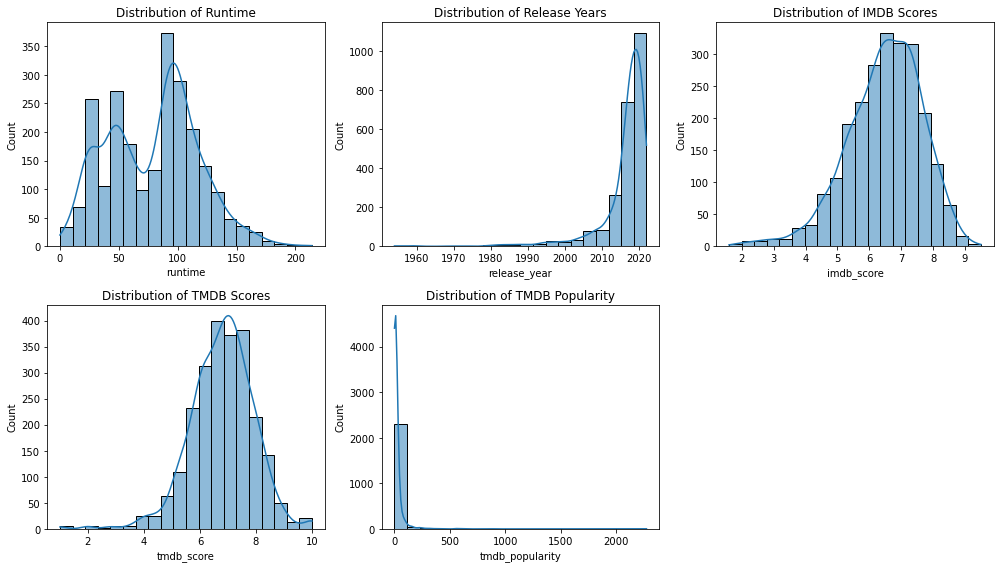

In [42]:
# Plotting distributions of numerical columns

plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(df_sandbox['runtime'], bins=20, kde=True)
plt.title('Distribution of Runtime')
plt.subplot(2, 3, 2)
sns.histplot(df_sandbox['release_year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.subplot(2, 3, 3)
sns.histplot(df_sandbox['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDB Scores')
plt.subplot(2, 3, 4)
sns.histplot(df_sandbox['tmdb_score'], bins=20, kde=True)
plt.title('Distribution of TMDB Scores')
plt.subplot(2, 3, 5)
sns.histplot(df_sandbox['tmdb_popularity'], bins=20, kde=True)
plt.title('Distribution of TMDB Popularity')
plt.tight_layout()
plt.show()


1. **Runtime Distribution**:
   - Multimodal distribution with multiple peaks.
   - Indicates the presence of multiple subgroups or categories in the data.
   - The density line shows significant variability between peaks.

2. **Release Year Distribution**:
   - Highly skewed distribution with a pronounced peak on the left.
   - Most of the data is concentrated in a narrow range of values.
   - The long tail on the right suggests the presence of exceptionally high values.

3. **IMDB Score Distribution**:
   - Approximately normal distribution with a slight right skew.
   - Most of the data is centered around the mean.
   - The density line is symmetrical with a slight deviation to the right.

4. **TMDB Score Distribution**:
   - Normal or Gaussian distribution.
   - Data is symmetrically distributed around the mean.
   - The density line follows the classic bell curve.

5. **TMDB Popularity Distribution**:
   - Extremely skewed distribution with a very pronounced peak on the left and a long tail on the right.
   - Most values are concentrated in a very narrow range.
   - Presence of significant outliers in the long tail.


#### Display basic statistics

In [43]:
# Calculate and display basic statistics of the dataset in tabular format
basic_stats = df_sandbox.describe(include='all')
print("Basic statistics of the dataset:")
display(HTML(basic_stats.to_html()))


Basic statistics of the dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
count,2380,2380,2380,2380,2380.000000,2380,2380.000000,2380,2380,2380,2380,2380.000000,2.380000e+03,2380.000000,2380.000000,2380.000000,2380.000000
unique,2380,2367,2,2379,NaN,12,NaN,936,247,19,2380,NaN,NaN,NaN,NaN,NaN,NaN
top,tm154986,The Call,MOVIE,No description available,NaN,NR,NaN,['comedy'],['US'],0,tt0068473,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,1535,2,NaN,1038,NaN,198,833,1535,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.352521,NaN,79.541597,NaN,NaN,NaN,NaN,6.483445,2.314399e+04,23.459743,6.790849,13.676891,1.165126
std,NaN,NaN,NaN,NaN,6.863934,NaN,38.261994,NaN,NaN,NaN,NaN,1.179845,8.458833e+04,87.864446,1.137428,14.944292,0.544028
min,NaN,NaN,NaN,NaN,1954.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.600000,5.000000e+00,0.600000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,46.000000,NaN,NaN,NaN,NaN,5.800000,6.607500e+02,3.207750,6.100000,4.000000,1.000000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,88.000000,NaN,NaN,NaN,NaN,6.600000,2.585500e+03,7.803500,6.900000,10.000000,1.000000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,105.000000,NaN,NaN,NaN,NaN,7.300000,1.049000e+04,17.345000,7.500000,18.000000,1.000000


We can already make some observations about the data:

- There are 2380 records in total.
- There are 2380 unique IDs.
- 2367 unique titles.
- Two distinct types (MOVIE and SHOW/SERIES).
- 2379 unique descriptions.
- 12 different age certifications.
- 936 unique runtimes.
- 247 unique genres.
- 19 unique production countries.
- 2380 unique IMDb IDs.

- The most frequent title is "The Call" with 2 occurrences.
- The most common age certification is "NR" with 1038 occurrences.
- The most frequent genre is "comedy" with 198 occurrences.
- The most common production country is "US" with 833 occurrences.
- The most common number of seasons is 0 with 1535 occurrences.

- The average release year is 2016.35 with a standard deviation of 6.86 years.
- The average runtime is 79.54 minutes with a standard deviation of 38.26 minutes.
- The average IMDb score is 6.48 with a standard deviation of 1.18.
- The average number of IMDb votes is 23143.99 with a standard deviation of 84588.33.
- The average popularity on TMDb is 23.46 with a standard deviation of 87.86.
- The average TMDb score is 6.79 with a standard deviation of 1.14.
- The average number of cast members is 13.68 with a standard deviation of 14.94.
- The average number of production countries is 1.17 with a standard deviation of 0.54.

- Release year: minimum 1954, maximum 2022.
- Runtime: minimum 0 minutes, maximum 214 minutes.
- IMDb score: minimum 1.6, maximum 9.5.
- Number of IMDb votes: minimum 5, maximum 1775990.
- Popularity on TMDb: minimum 0.6, maximum 2274.044.
- TMDb score: minimum 1, maximum 10.
- Number of cast members: minimum 0, maximum 137.
- Number of production countries: minimum 1, maximum 7.


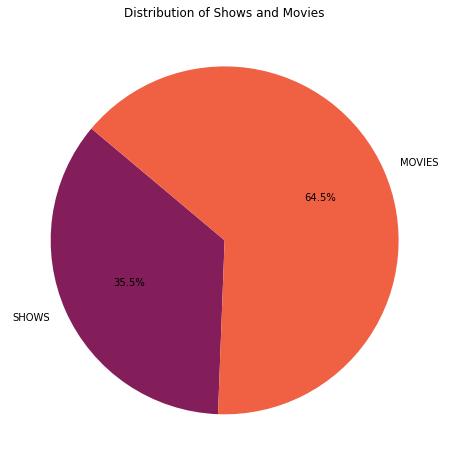

In [44]:
y = np.array([df_sandbox[df_sandbox.type == "SHOW"].shape[0], df_sandbox[df_sandbox.type == "MOVIE"].shape[0]])
mylabels = ["SHOWS", "MOVIES"]
colors = sns.color_palette("rocket", len(y))
plt.figure(figsize=(11, 8))
plt.pie(y, labels=mylabels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Shows and Movies')
plt.show()


### Movie and show Country Creator

In [57]:
# Filter the data for movies and shows

movies_df = df_sandbox[df_sandbox['type'] == 'MOVIE']
shows_df = df_sandbox[df_sandbox['type'] == 'SHOW']

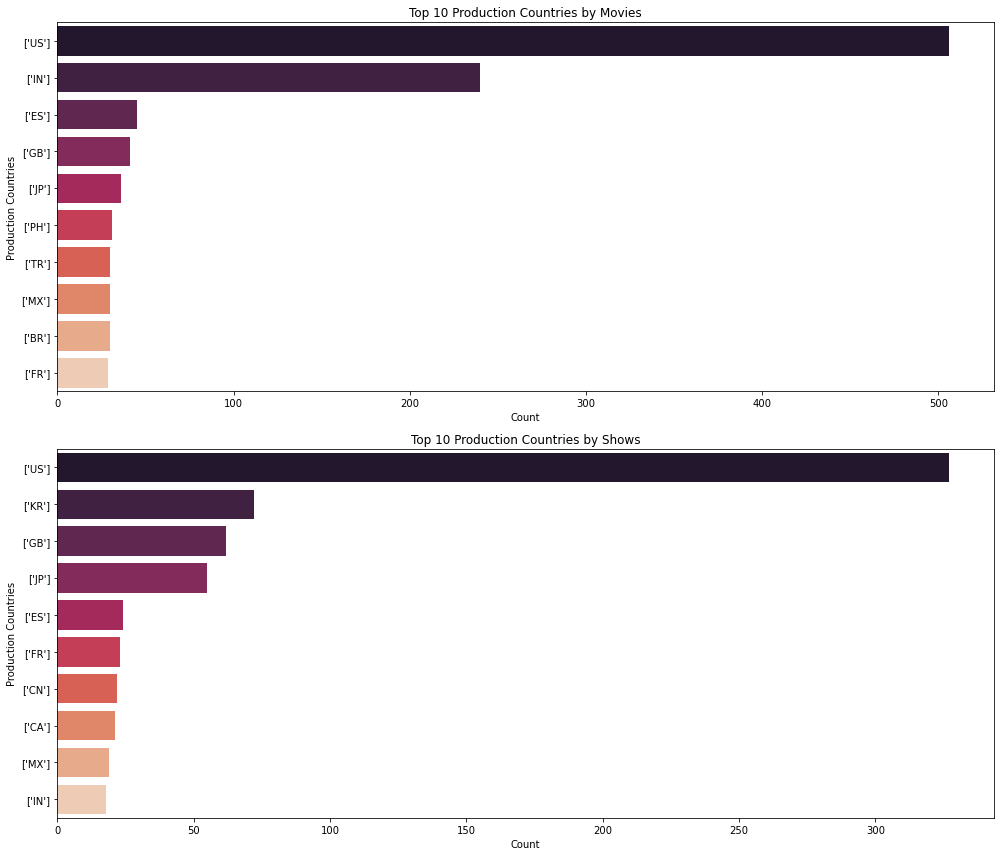

In [58]:
# Calculate the top 10 production countries for movies and shows
top_production_countries_movies = movies_df['production_countries'].explode().value_counts().head(10)
top_production_countries_shows = shows_df['production_countries'].explode().value_counts().head(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
sns.barplot(x=top_production_countries_movies.values, y=top_production_countries_movies.index, palette='rocket', ax=axes[0])
axes[0].set_title('Top 10 Production Countries by Movies')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Production Countries')

sns.barplot(x=top_production_countries_shows.values, y=top_production_countries_shows.index, palette='rocket', ax=axes[1])
axes[1].set_title('Top 10 Production Countries by Shows')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Production Countries')

plt.tight_layout()
plt.show()



**1.** The first chart shows the "Top 10 Production Countries by Movies," listing the countries that produce the most films in the analyzed dataset:

- **United States (US)**: Dominates film production with a count approaching 500. This reflects the strong film industry in the United States, particularly Hollywood.
- **India (IN)**: The second most productive country with a count close to 200. India, with Bollywood and other regional film industries, produces a high number of films each year.
- **Spain (ES)**: Third in film production, showing the vitality of the Spanish film industry.
- **United Kingdom (GB)**: Fourth on the list, reflecting the significant contribution of the UK to global cinema.
- **Japan (JP)**: Fifth on the list, highlighting the strong film production in Japan, both in animation and live-action cinema.
- Other countries like **Philippines (PH)**, **Turkey (TR)**, **Mexico (MX)**, **Brazil (BR)**, and **France (FR)** complete the top 10 list, each with a significant but lower contribution compared to the countries listed above.

**2.** The second chart "Top 10 Production Countries by Shows" shows the leading countries in TV show production:

- **United States (US)**: Dominates TV show production with a very high count approaching 300. This reflects the extensive entertainment industry in the United States, including the production of various TV series genres.
- **South Korea (KR)**: The second most productive country with a count above 100. South Korea is well-known for its drama and K-pop industry, which has a significant global following.
- **United Kingdom (GB)**: Third on the list, with a count close to 100. The UK has a long-standing tradition of producing high-quality TV series that are popular both locally and internationally.
- **Japan (JP)**: Fourth on the list, Japan is known for producing a wide range of TV programs, including anime, which has a global fan base.
- **Spain (ES)**: Fifth place, Spain has seen growth in its global visibility thanks to successful series that have found a large international audience.
- Other countries like **France (FR)**, **China (CN)**, **Canada (CA)**, **Mexico (MX)**, and **India (IN)** complete the top 10. Each country significantly contributes to the global production of TV programs, with their presence reflecting different cultural traditions and audience preferences.

### Top Genre Movies

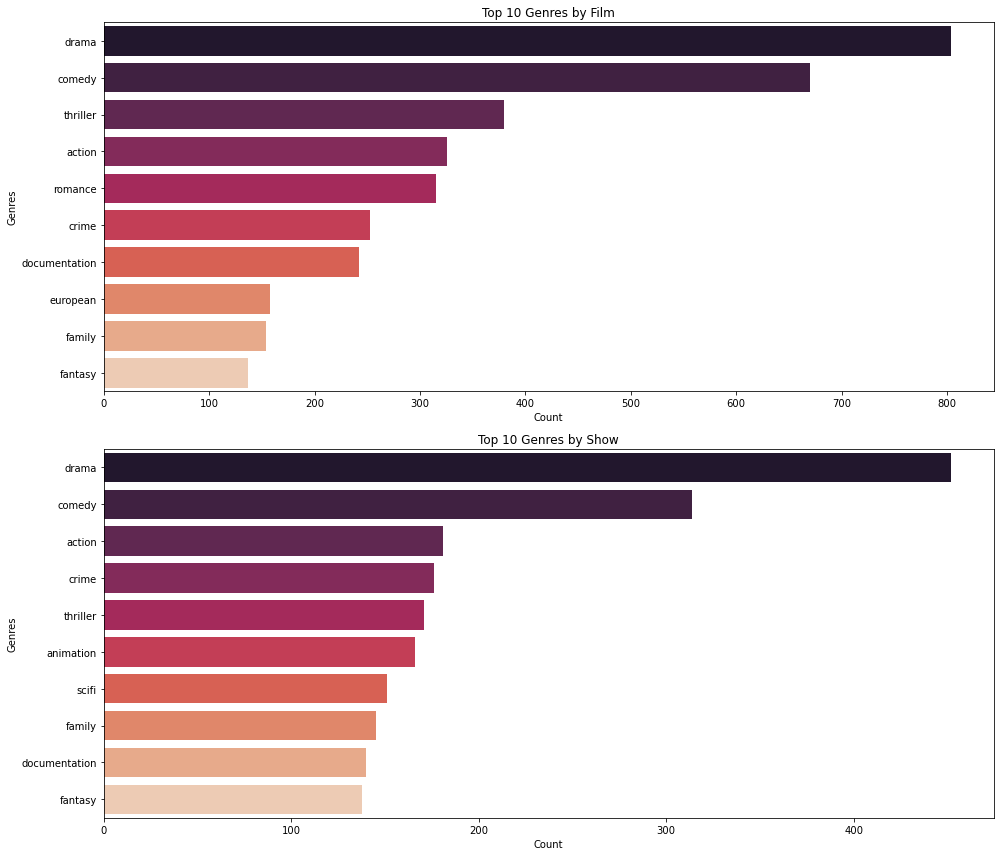

In [59]:
# Explode genres for movies and shows
movies_genres = movies_df['genres'].explode().str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts().head(10)
shows_genres = shows_df['genres'].explode().str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts().head(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.barplot(x=movies_genres.values, y=movies_genres.index, palette='rocket', ax=axes[0])
axes[0].set_title('Top 10 Genres by Film')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genres')

sns.barplot(x=shows_genres.values, y=shows_genres.index, palette='rocket', ax=axes[1])
axes[1].set_title('Top 10 Genres by Show')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Genres')

plt.tight_layout()
plt.show()


**1.** The first chart shows the frequency distribution of movie genres, indicating the "Top 10 Genres by Movies" in the dataset:

- **Drama**: The most predominant genre with a count exceeding 700. Clearly the most popular genre among movies in the dataset.
- **Comedy**: The second most common genre, with a count close to 500. This suggests a strong preference for comedy movies as well.
- **Thriller**: Follows as the third most frequent genre with a count around 350. Indicates a good popularity of movies that offer suspense and tension.
- **Action**: Fourth in the ranking, with a count just above 300. Shows that action movies have a solid fan base.
- **Romance**: Fifth most frequent genre, slightly below 300. Reflects the interest in love stories and relationships.
- Other genres like **Crime**, **Documentation**, **European**, **Family**, and **Fantasy** appear as less frequent but still among the top 10 genres, each represented with gradually decreasing counts. This ranges from just under 300 for "Crime" to just over 100 for "Fantasy."

**2.** The second chart shows the "Top 10 Genres by Shows," highlighting the relative frequencies of different genres in TV programs in the dataset. We observe the predominant genres and their characteristics:

- **Drama**: The most predominant genre with a count exceeding 350. Demonstrates the importance of drama in TV shows, often at the center of series and shows.
- **Comedy**: Second most popular genre, with a count around 300. The popularity of this genre reflects the preference for light and humorous entertainment.
- **Action**: Third most frequent genre, with a count close to 250. Action in TV shows is significant, indicating a demand for dynamism and action-packed sequences.
- **Crime**: Fourth most frequent genre, slightly below 250. This reflects the interest in stories focused on crime, mystery, and investigation.
- **Thriller**: Fifth most frequent genre, just above 200. Shows an interest in tension and suspense in TV programs.
- Other genres like **Animation**, **Sci-Fi**, **Family**, **Documentation**, and **Fantasy** appear with lower frequencies. These genres, while less dominant, show a variety of interests and themes covered in TV programs.


### Movie Trend Release

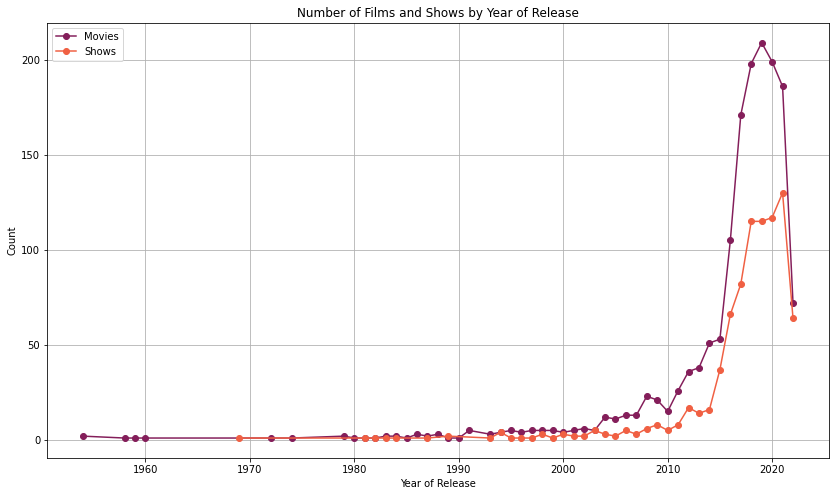

In [60]:
release_trend_movies = movies_df['release_year'].value_counts().sort_index()
release_trend_shows = shows_df['release_year'].value_counts().sort_index()

colors = sns.color_palette("rocket", 2)
plt.figure(figsize=(14, 8))
plt.plot(release_trend_movies.index, release_trend_movies.values, label='Movies', marker='o', color=colors[0])
plt.plot(release_trend_shows.index, release_trend_shows.values, label='Shows', marker='o', color=colors[1])
plt.title('Number of Films and Shows by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


The chart shows two time series representing the production of movies (blue line) and TV shows (orange line) over time:

- The production of movies and shows is relatively low and stable until 2000. This period shows that, despite productions occurring, there wasn't significant growth. This could reflect the technical, economic, or market limitations of that time.

- Starting from 2000, there is a gradual increase in the production of both movies and shows. This rise might have been influenced by the emergence of new digital technologies and the globalization of media markets, making production and distribution more accessible.

- From 2010, there is an exponential growth in movie production, peaking in 2019. TV show production also increases significantly, although its peak is slightly lower than that of movies. This period saw the explosion of streaming services like Netflix, Amazon Prime Video, and Hulu, which greatly increased the demand for original content, driving massive production of series and movies.

- Both lines show a marked decline in 2020. This drop can be directly linked to the impacts of the COVID-19 pandemic, which caused significant disruptions in the production of movies and TV series due to global restrictions and safety measures.


### Number of movies by age certification

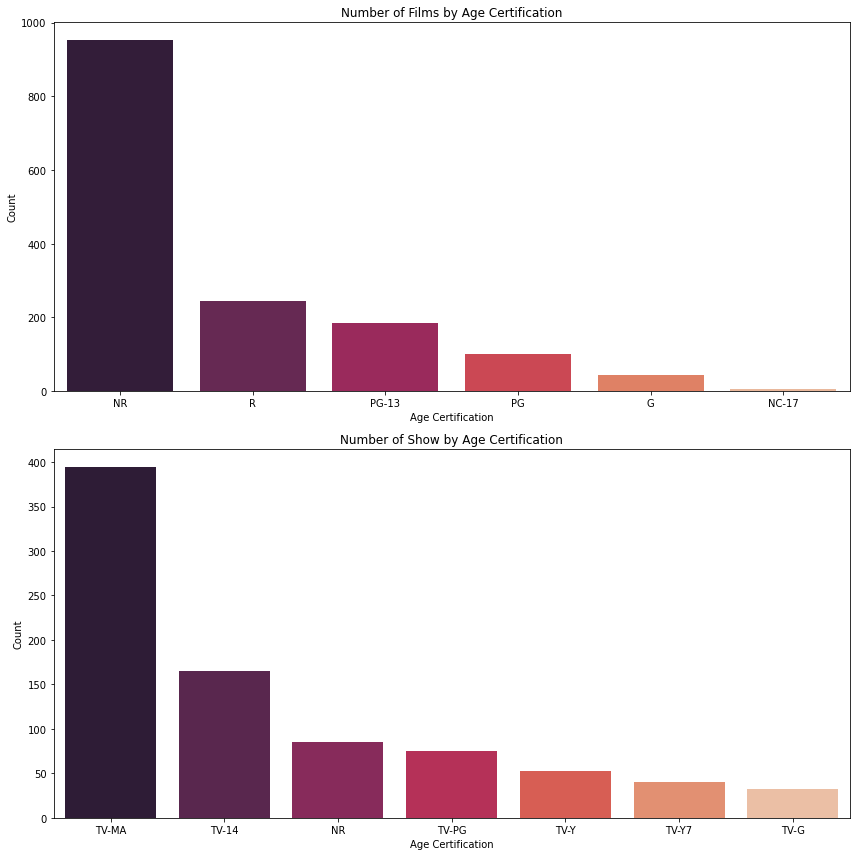

In [61]:
age_certification_movies = movies_df['age_certification'].value_counts()
age_certification_shows = shows_df['age_certification'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.barplot(x=age_certification_movies.index, y=age_certification_movies.values, palette='rocket', ax=axes[0])
axes[0].set_title('Number of Films by Age Certification')
axes[0].set_xlabel('Age Certification')
axes[0].set_ylabel('Count')

sns.barplot(x=age_certification_shows.index, y=age_certification_shows.values, palette='rocket', ax=axes[1])
axes[1].set_title('Number of Show by Age Certification')
axes[1].set_xlabel('Age Certification')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**1.** The chart "Number of Movies by Age Certification" shows the distribution of movies based on different age ratings.

- **NR (Not Rated)**: With about 800 movies, this is the predominant category, indicating a high number of movies that have not been rated according to standard age criteria. This could include independent films, foreign productions that have not undergone formal rating, or films distributed in contexts where certification is not mandatory.

- **R (Restricted)**: This category, with about 200 movies, includes those films that require viewers under 17 to be accompanied by an adult. The significant presence of R-rated films reflects the common production of films with content intended for an adult audience.

- **PG-13 (Parents Strongly Cautioned)**: With about 150 movies, this category suggests that the films are appropriate for viewers over the age of 13. This indicates a tendency to produce films that contain more mature material but are still accessible to young teens with some supervision.

- **PG (Parental Guidance Suggested)**: About 100 movies fall into this category, which is recommended for viewing with parental guidance, indicating content generally suitable for children but with possible elements that might not be appropriate for younger children.

- **G (General Audiences)**: With a relatively low number of films, about 50, this category is suitable for all age groups. G-rated films are designed to be inoffensive and are typically aimed at a family audience.

- **NC-17 (No One 17 and Under Admitted)**: This category, with the lowest number of films, represents movies that are not suitable for viewers under 17 and who cannot be admitted even if accompanied. Their minimal presence suggests limited production of films with extremely mature or explicit content, often due to restrictions in distribution and marketing.

**2.** The chart "Number of Shows by Age Certification" shows the distribution of TV programs based on their age ratings:

- **TV-MA (Mature Audience)**: With about 400 shows, this is the predominant category. It indicates that a large amount of TV programs are intended for a mature audience, presumably with content that may include explicit language, violence, sexuality, or adult themes.

- **TV-14 (Parents Strongly Cautioned)**: With about 150 shows, this category ranks as the second most numerous. TV-14 rated shows may contain material that parents might find unsuitable for children under 14 without adult supervision, suggesting a moderate level of maturity in the content.

- **NR (Not Rated)**: This category includes about 100 shows that have not undergone the formal rating process. This can include international content, independent productions, or those distributed on platforms that do not require standard ratings.

- **TV-PG (Parental Guidance Suggested)**: With about 75 shows, this category suggests that the programs may contain material that some parents might consider inappropriate for younger children but are generally acceptable for a broader audience compared to TV-14.

- **TV-Y (All Children)**: With a lower number of about 50 shows, this category is designed to be appropriate for all children, indicating very harmless content often educational or entertaining.

- **TV-Y7 (Directed to Older Children)**: Similar to TV-Y, but with about 50 shows, this rating suggests that the programs are suitable for children age 7 and above. The content may include mild action scenes not suitable for younger children.

- **TV-G (General Audiences)**: With the lowest number of shows, about 50, this rating indicates that the content is suitable for all ages and does not contain material that parents might find offensive for children.


### Scatter Plot between runtime and imdb_score

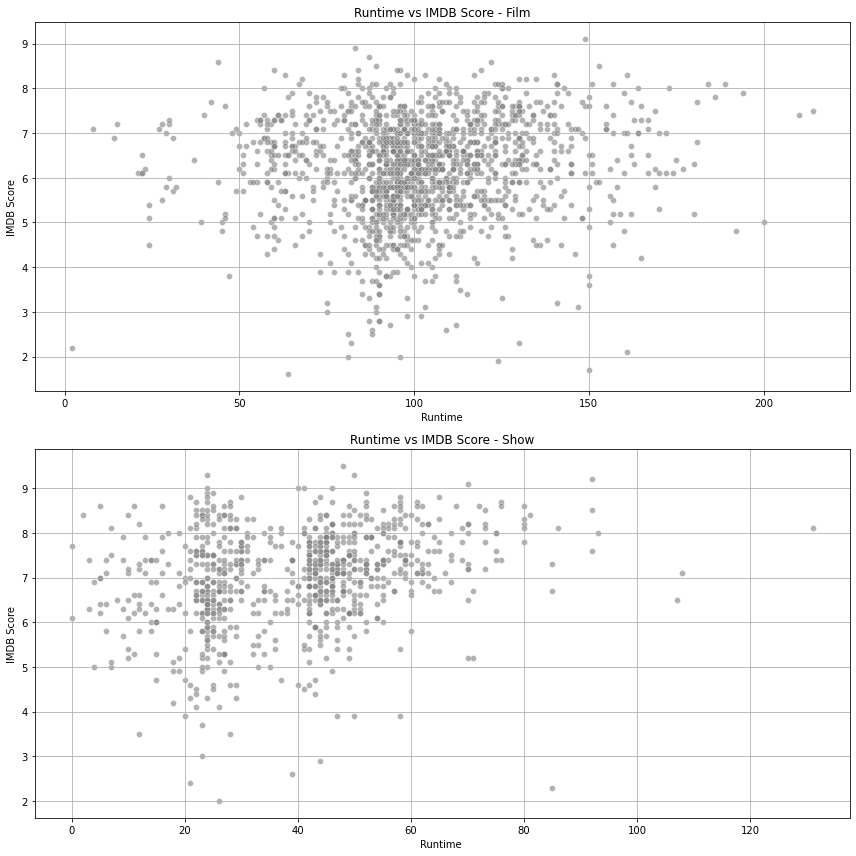

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

sns.scatterplot(x=movies_df['runtime'], y=movies_df['imdb_score'], ax=axes[0], color='gray', alpha=0.6)
axes[0].set_title('Runtime vs IMDB Score - Film')
axes[0].set_xlabel('Runtime')
axes[0].set_ylabel('IMDB Score')
axes[0].grid(True)

sns.scatterplot(x=shows_df['runtime'], y=shows_df['imdb_score'], ax=axes[1], color='gray', alpha=0.6)
axes[1].set_title('Runtime vs IMDB Score - Show')
axes[1].set_xlabel('Runtime ')
axes[1].set_ylabel('IMDB Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**1.** The "Runtime vs IMDB Score for Movies" chart shows the distribution of IMDb scores relative to the runtime of movies:

- Most movies have an IMDb score ranging between 5 and 8, with a dense concentration of points around this range.
- Most movies have a runtime between 80 and 140 minutes. There are few movies with extremely short (less than 50 minutes) or very long (over 200 minutes) durations.
- Movies with a runtime between 90 and 130 minutes seem to have higher IMDb scores, suggesting that this might be the "ideal duration" to achieve an optimal balance between content, plot development, and audience engagement.
- Movies with very short or extremely long durations tend to have a wider range of scores, which may reflect niche genres or styles that do not necessarily meet the favor of a broad audience.
- Movies that fit the "standard" duration of about 90-120 minutes tend to have higher average scores, with a peak in data density between 100 and 120 minutes. This might indicate that most popular and well-reviewed movies conform to this duration.
- There doesn't seem to be a strong and direct correlation between runtime and IMDb score, but movies within a certain duration tend to receive higher scores. This suggests that there is an "optimal duration" that tends to meet the expectations of both audiences and critics.

**2.** The "Runtime vs IMDB Score for Shows" chart shows the relationship between the runtime of TV show episodes and their IMDb scores:

- Most scores are concentrated between 5 and 8, with a fairly even distribution within this range.
- Most TV shows have a runtime between 20 and 60 minutes per episode. Some shows extend up to about 100 minutes, but these are less common.
- The highest concentration of episodes is in the 40-60 minute range, which is a typical duration for many drama or comedy TV series formats.
- There doesn't seem to be a clear and direct relationship between runtime and score, as shows of various durations receive high scores. However, there are some isolated points indicating longer shows (over 60 minutes) maintaining high scores, suggesting that longer shows can be well-rated if the content is strong.
- Shows with very short durations (less than 20 minutes) show significant variation in scores, ranging from low to medium. This might indicate that very short formats are riskier in terms of audience reception.
- Unlike movies, for TV shows, there doesn't seem to be a strong correlation between runtime and score. TV shows are rated across multiple episodes and seasons, which can influence the overall perception regardless of the duration of individual episodes.


### Scatter Plot between cast_size and tmdb_popularity

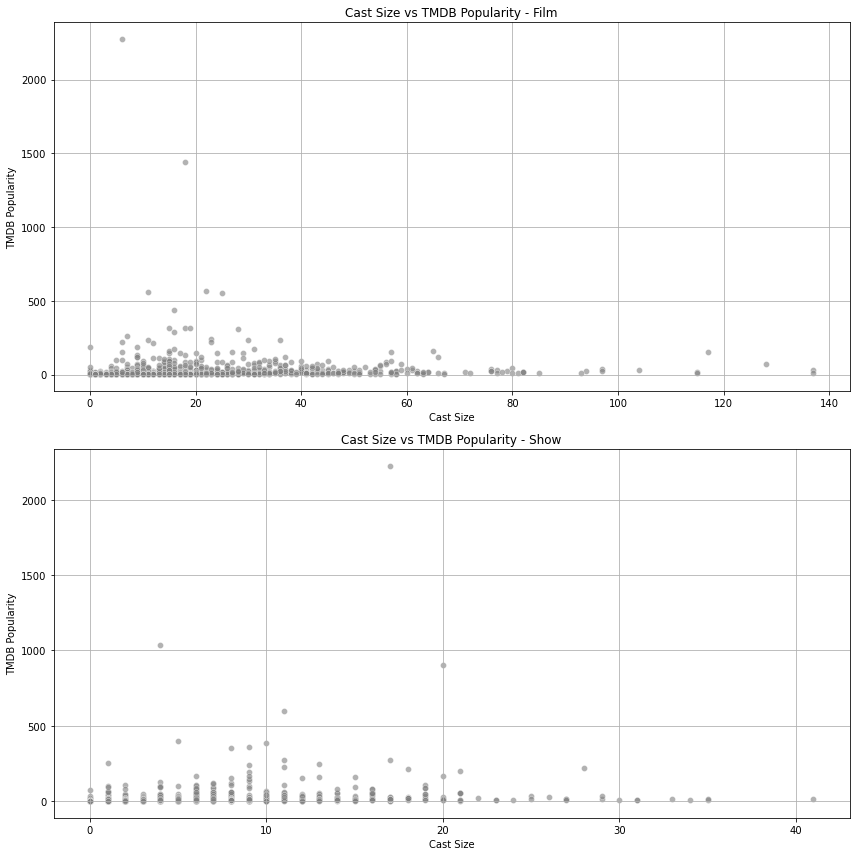

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.scatterplot(x=movies_df['cast_size'], y=movies_df['tmdb_popularity'], ax=axes[0], color='gray', alpha=0.6)
axes[0].set_title('Cast Size vs TMDB Popularity - Film')
axes[0].set_xlabel('Cast Size')
axes[0].set_ylabel('TMDB Popularity')
axes[0].grid(True)

sns.scatterplot(x=shows_df['cast_size'], y=shows_df['tmdb_popularity'], ax=axes[1], color='gray', alpha=0.6)
axes[1].set_title('Cast Size vs TMDB Popularity - Show')
axes[1].set_xlabel('Cast Size')
axes[1].set_ylabel('TMDB Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**1.** The chart "Cast Size vs TMDb Popularity for Movies" illustrates the relationship between the size of a movie's cast and its popularity on TMDb:

- Most movies have a cast size ranging from 0 to 40 members, with popularity generally remaining below 500 points on TMDb.
- Some movies with moderate cast sizes (around 20-40 members) achieve very high levels of popularity, with some points exceeding 500 and even 1000 points on TMDb.
- There are movies with very large casts (over 100 members) that show relatively low popularity, suggesting that a large cast is not necessarily correlated with higher popularity.
- There doesn't seem to be a strong and direct correlation between cast size and a movie's popularity on TMDb. Many movies with relatively small casts have similar popularity to those with larger casts.
- The most popular movies tend to have moderate-sized casts, which might suggest that balancing the cast in terms of quantity and quality could be a more critical factor than just the number of members.
- Other factors, such as the movie's plot, production, marketing, presence of movie stars, or critical reception, might have a much more significant impact on a movie's popularity than just cast size.
- These data might suggest to producers to focus on other aspects of movie production besides cast size to maximize popularity and success.

**2.** The chart "Cast Size vs TMDb Popularity for Shows" illustrates the relationship between the size of a TV show's cast and its popularity on TMDb:

- Most shows have a cast size ranging from 0 to 20 members, with popularity generally remaining below 200 points on TMDb.
- There are some shows with significantly higher popularity, reaching scores over 1000 points, despite cast sizes not exceeding 20 members.
- There doesn't seem to be a strong and direct correlation between cast size and a show's popularity on TMDb. Most shows with small to moderate cast sizes tend to achieve a variety of popularity scores.
- Shows that achieve extreme levels of popularity have relatively small cast sizes, suggesting that other factors such as production quality, marketing, storyline, or presence of stars might play a more significant role in determining a show's popularity.
- Shows with very large casts (over 20 members) do not necessarily show higher popularity. This might indicate that having an excessively large cast is not a decisive advantage for popularity on platforms like TMDb.


### Scatter Plot between tmbd_score and imbd_score

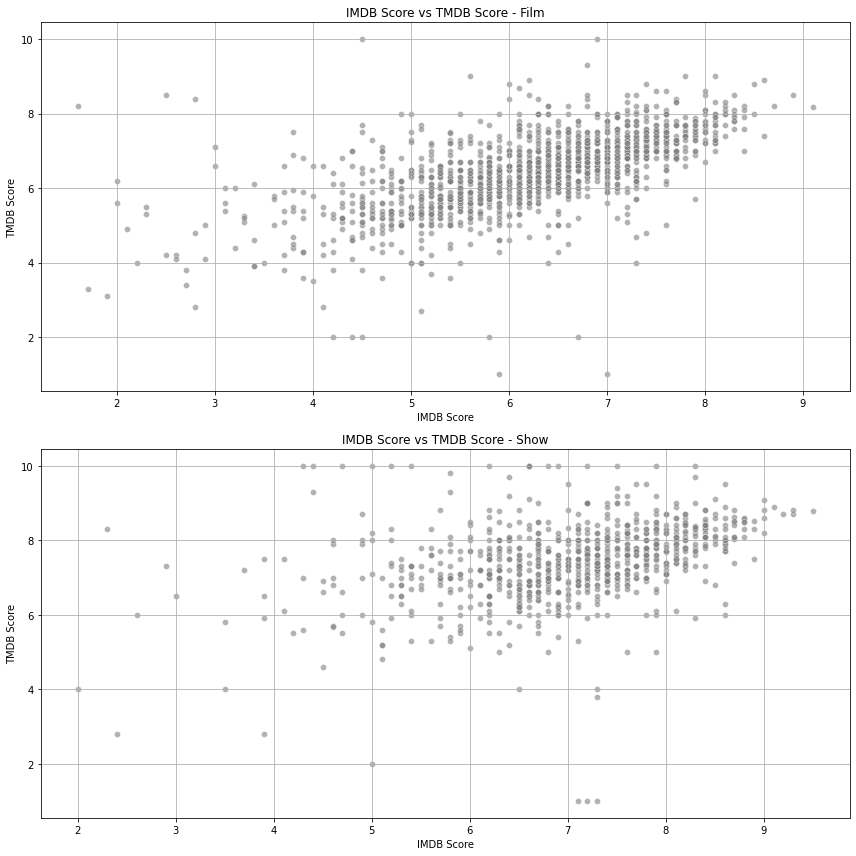

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

sns.scatterplot(x=movies_df['imdb_score'], y=movies_df['tmdb_score'], ax=axes[0], color='gray', alpha=0.6)
axes[0].set_title('IMDB Score vs TMDB Score - Film')
axes[0].set_xlabel('IMDB Score')
axes[0].set_ylabel('TMDB Score')
axes[0].grid(True)

sns.scatterplot(x=shows_df['imdb_score'], y=shows_df['tmdb_score'], ax=axes[1], color='gray', alpha=0.6)
axes[1].set_title('IMDB Score vs TMDB Score - Show')
axes[1].set_xlabel('IMDB Score')
axes[1].set_ylabel('TMDB Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**1.** The chart "IMDB Score vs TMDb Score for Movies" shows the relationship between IMDb scores and TMDb scores for various movies:

- Most movies are concentrated in an IMDb score range of about 5 to 8, with similar TMDb scores. This indicates some consistency between the two platforms in terms of rating the quality of movies.
- The data shows a positive correlation between IMDb scores and TMDb scores, especially for movies with medium and high scores. As the IMDb score increases, the TMDb score also tends to increase, suggesting that movies generally well-rated on one platform tend to be well-rated on the other as well.
- For movies with IMDb scores above 6, the correlation with TMDb scores becomes more pronounced. This may indicate that for movies generally recognized as high quality, there is substantial agreement between the two platforms on how good they are.
- Movies with IMDb scores below 5 show greater variability in their TMDb scores. This could reflect differences in audience perception or rating criteria between the two platforms, especially for lower-quality or niche films.
- Some movies with high scores on one platform do not necessarily correspond to equally high scores on the other, but these cases are relatively rare, highlighting only a few discrepancies in ratings.

**2.** The chart "IMDB Score vs TMDb Score for Shows" illustrates the relationship between IMDb scores and TMDb scores for various TV shows. Let's analyze the key trends and characteristics observable:

- Most shows have IMDb scores ranging between 5 and 8, with corresponding TMDb scores showing a similar trend. This indicates a general consistency between the ratings on the two platforms.
- As with movies, there is a positive correlation between IMDb scores and TMDb scores for TV shows. This suggests that shows well-rated on one platform tend to be well-rated on the other as well.
- For IMDb scores above 6, the correlation with TMDb scores becomes even more evident. This may indicate substantial agreement between the platforms regarding the quality of higher-rated shows.
- Shows with lower IMDb scores, particularly those below 5, show greater variability in their TMDb scores. This may reflect divergences in audience perception or rating criteria between the two platforms, especially for less popular or niche shows.
- The clustering of points in the middle and higher ranges indicates that most shows receive consistent ratings between the two platforms, suggesting that both platforms reflect reliable audience and critical evaluations.

### Correlation matrix

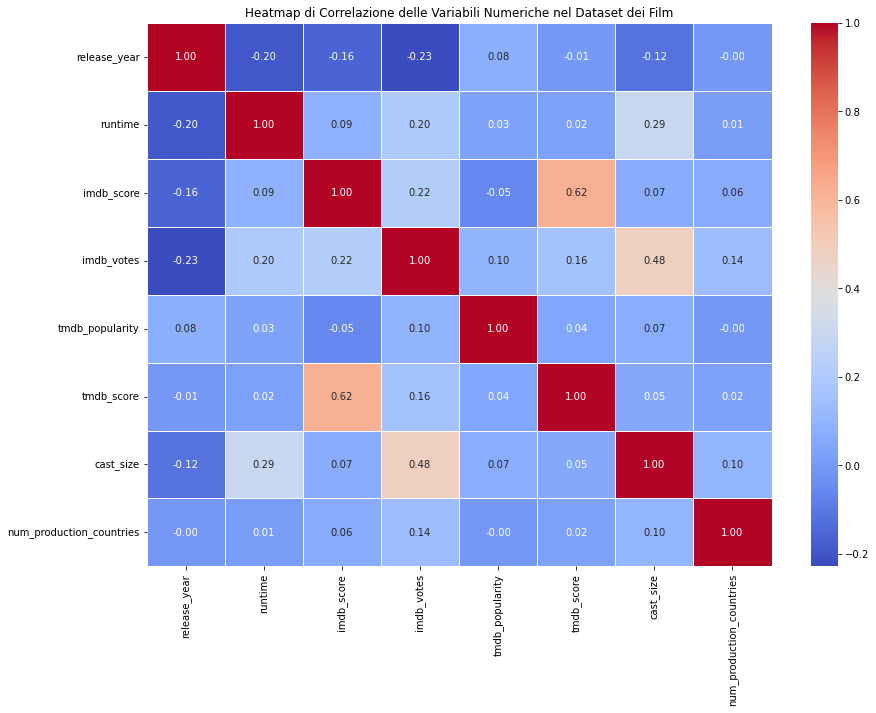

In [65]:
correlation_matrix = movies_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap di Correlazione delle Variabili Numeriche nel Dataset dei Film')
plt.show()


**1.** The chart is a correlation matrix between various numerical variables in the movie dataset. It serves to quickly identify strong, weak, or absent relationships between the variables:

- **Release Year and Runtime**: Correlation of -0.20, indicating a slight negative correlation. This might suggest that more recent movies tend to have slightly shorter runtimes, but the relationship is not very strong.

- **IMDb Score and TMDb Popularity**: Correlation of 0.08, very weak, indicating that there is no significant relationship between the IMDb score and TMDb popularity.

- **IMDb Score and TMDb Score**: Moderate positive correlation (0.62), indicating that movies rated well on IMDb tend to be rated well on TMDb as well.

- **TMDb Score and IMDb Votes**: Correlation of 0.16, which is weak. It indicates a positive but not particularly strong relationship between IMDb votes and TMDb scores.

- **TMDb Popularity and Cast Size**: Correlation of 0.07, which is very weak, showing that there is no strong relationship between cast size and TMDb popularity.

- **Cast Size and IMDb Votes**: Correlation of 0.48, a moderate correlation suggesting that movies with larger casts tend to receive more votes. This could reflect greater visibility or interest in movies with large casts.


## MOVIE

From this point onward in the analysis, we will focus on the DataFrame composed only of movies to test the hypotheses made.

## Feature Engineering and Transformation

In [66]:
movies_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cast_size,num_production_countries
0,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673,10.010,7.3,22,1
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0,tt0079470,8.0,395024,17.770,7.8,21,1
3,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NR,115,"['romance', 'comedy']",['US'],0,tt0047673,7.5,42488,8.915,7.2,24,1
4,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],0,tt0051390,7.5,4471,5.546,7.3,28,1
5,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NR,133,['drama'],['EG'],0,tt0077751,7.2,1727,1.370,6.0,26,1


In [67]:
movies_df.shape

(1535, 17)

#### Remove variables that are not necessary for our analysis

In [68]:
movies_df_cleaned = movies_df.drop(columns=['type', 'seasons', 'description','id', 'title', 'imdb_id', 'imdb_votes'])


####  Average between the IMDb score and TMDb score as new variable

In [69]:
movies_df_cleaned['average_score'] = movies_df_cleaned[['imdb_score', 'tmdb_score']].mean(axis=1)
movies_df_cleaned = movies_df_cleaned.drop(columns=['imdb_score', 'tmdb_score'])

In [70]:
movies_df_cleaned.head(10)

,release_year,age_certification,runtime,genres,production_countries,tmdb_popularity,cast_size,num_production_countries,average_score
0,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],10.010,22,1,7.50
2,1979,R,94,['comedy'],['GB'],17.770,21,1,7.90
3,1954,NR,115,"['romance', 'comedy']",['US'],8.915,24,1,7.35
4,1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],5.546,28,1,7.40
5,1979,NR,133,['drama'],['EG'],1.370,26,1,6.60
6,1980,NR,161,"['drama', 'comedy', 'crime', 'romance', 'action']",['IN'],3.980,19,1,3.50
7,1954,NR,100,"['crime', 'romance', 'drama']",['EG'],2.184,9,1,7.20
8,1960,NR,158,"['drama', 'thriller', 'crime']",['IN'],0.792,5,1,6.35
10,1974,NR,162,"['romance', 'drama', 'comedy']",['IN'],1.532,0,1,5.90
11,1959,NR,142,"['romance', 'crime', 'drama']",['IN'],0.840,9,1,6.30


#### Compute Success variable

In [71]:
success_threshold = 6.5
movies_df_cleaned['success'] = (movies_df_cleaned['average_score'] >= success_threshold).astype(int)


In [72]:
movies_df_cleaned.head()

,release_year,age_certification,runtime,genres,production_countries,tmdb_popularity,cast_size,num_production_countries,average_score,success
0,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],10.010,22,1,7.50,1
2,1979,R,94,['comedy'],['GB'],17.770,21,1,7.90,1
3,1954,NR,115,"['romance', 'comedy']",['US'],8.915,24,1,7.35,1
4,1958,NR,77,"['drama', 'crime', 'comedy']",['EG'],5.546,28,1,7.40,1
5,1979,NR,133,['drama'],['EG'],1.370,26,1,6.60,1


### Categorical Variables. 
Convert categorical variables to numeric using techniques like One-Hot Encoding.

#### One-Hot Encoding 'age_certification'

In [73]:
one_hot_encoded_age = pd.get_dummies(movies_df_cleaned['age_certification'], prefix='age_')
movies_df_cleaned = pd.concat([movies_df_cleaned, one_hot_encoded_age], axis=1)
movies_df_cleaned = movies_df_cleaned.drop(columns=['age_certification'])


#### One-Hot Encoding 'genres'

In [74]:
# Identify the top genres (top 10)
top_genres = movies_df_cleaned['genres'].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts().head(10).index
def encode_genres(row):
    genres = row.strip("[]").replace("'", "").split(", ")
    encoding = {f'genre_{genre}': 1 if genre in genres else 0 for genre in top_genres}
    encoding['genre_Other'] = 1 if not any(genre in genres for genre in top_genres) else 0
    return pd.Series(encoding)
genre_encoded_df = movies_df_cleaned['genres'].apply(encode_genres)
movies_df_cleaned = pd.concat([movies_df_cleaned, genre_encoded_df], axis=1)
movies_df_cleaned = movies_df_cleaned.drop(columns=['genres'])


#### One-Hot Encoding 'production_countries'

In [75]:
# Identify the top production countries (top 10)
top_countries = movies_df_cleaned['production_countries'].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts().head(10).index
def encode_countries(row):
    countries = row.strip("[]").replace("'", "").split(", ")
    encoding = {f'country_{country}': 1 if country in countries else 0 for country in top_countries}
    encoding['country_Other'] = 1 if not any(country in countries for country in top_countries) else 0
    return pd.Series(encoding)

country_encoded_df = movies_df_cleaned['production_countries'].apply(encode_countries)
movies_df_cleaned = pd.concat([movies_df_cleaned, country_encoded_df], axis=1)
movies_df_cleaned = movies_df_cleaned.drop(columns=['production_countries'])



In [76]:
# Remove duplications due to row explosion
movies_df_cleaned = movies_df_cleaned.drop_duplicates()


In [77]:
movies_df_cleaned.head()

,release_year,runtime,tmdb_popularity,cast_size,num_production_countries,average_score,success,age__G,age__NC-17,age__NR,...,country_IN,country_GB,country_FR,country_CA,country_ES,country_DE,country_JP,country_MX,country_BR,country_Other
0,1972,109,10.010,22,1,7.50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,17.770,21,1,7.90,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1954,115,8.915,24,1,7.35,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1958,77,5.546,28,1,7.40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1979,133,1.370,26,1,6.60,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [78]:
movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 2441
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_year              1535 non-null   int64  
 1   runtime                   1535 non-null   int64  
 2   tmdb_popularity           1535 non-null   float64
 3   cast_size                 1535 non-null   int64  
 4   num_production_countries  1535 non-null   int64  
 5   average_score             1535 non-null   float64
 6   success                   1535 non-null   int64  
 7   age__G                    1535 non-null   uint8  
 8   age__NC-17                1535 non-null   uint8  
 9   age__NR                   1535 non-null   uint8  
 10  age__PG                   1535 non-null   uint8  
 11  age__PG-13                1535 non-null   uint8  
 12  age__R                    1535 non-null   uint8  
 13  genre_drama               1535 non-null   int64  
 14  genre_co

In [79]:
columns_to_convert = [
    'age__G', 
    'age__NC-17', 
    'age__NR', 
    'age__PG', 
    'age__PG-13', 
    'age__R'
]
movies_df_cleaned[columns_to_convert] = movies_df_cleaned[columns_to_convert].astype(int)
print(movies_df_cleaned[columns_to_convert].dtypes)


age__G        int64
age__NC-17    int64
age__NR       int64
age__PG       int64
age__PG-13    int64
age__R        int64
dtype: object


# Testing hypothesis 

### H1: Movies with longer durations tend to have higher scores.

Correlation between runtime and average_score: 0.06542342825093457, P-value: 0.010350680328632993


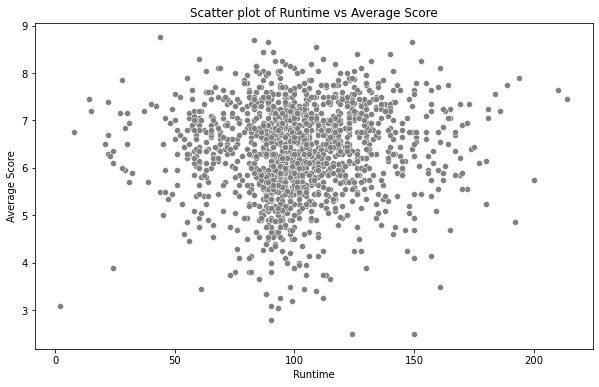

In [80]:
corr_runtime, p_value_runtime = pearsonr(movies_df_cleaned['runtime'], movies_df_cleaned['average_score'])
print(f"Correlation between runtime and average_score: {corr_runtime}, P-value: {p_value_runtime}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='average_score', color='grey', data=movies_df_cleaned)
plt.title('Scatter plot of Runtime vs Average Score')
plt.xlabel('Runtime')
plt.ylabel('Average Score')
plt.show()



- Most movies have average scores between 5 and 8 and runtimes between 80 and 140 minutes. The highest density of points is found between 90 and 120 minutes of runtime, with average scores between 5 and 8, suggesting that most movies fall within this range.

- The correlation between runtime and average score is 0.0654, indicating a very weak positive relationship. The associated p-value is 0.0104, which is below the common significance level of 0.05, indicating that the observed correlation is statistically significant.

- Despite the statistical significance, the very low correlation suggests that the practical impact of movie runtime on the average score is negligible. Other factors, such as plot, production quality, actors' performances, direction, and marketing, might have a greater influence on the average scores of movies.

- Therefore, the hypothesis that movies with longer runtimes tend to have higher scores is very weakly supported by the data, highlighting that runtime is not a strong predictor of perceived movie quality.

### H2: Movies with larger casts are generally rated higher.

Correlation between cast_size e average_score: 0.0664721331287536, P-value: 0.009185368954985203


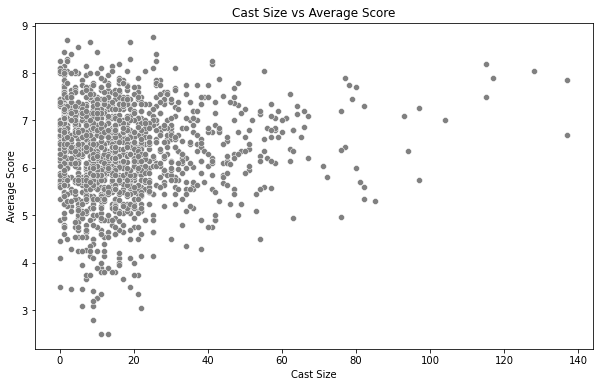

In [81]:
corr_cast_size, p_value_cast_size = pearsonr(movies_df_cleaned['cast_size'], movies_df_cleaned['average_score'])
print(f"Correlation between cast_size e average_score: {corr_cast_size}, P-value: {p_value_cast_size}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cast_size', y='average_score',color='grey', data=movies_df_cleaned)
plt.title('Cast Size vs Average Score')
plt.xlabel('Cast Size')
plt.ylabel('Average Score')
plt.show()


- The chart is a scatter plot representing the relationship between cast size (cast_size) and the average score (average score) of movies.

- Most movies have a cast size between 0 and 20 members, with average scores mainly ranging between 5 and 8. The highest density of points is found in the region with casts between 5 and 20 members and average scores between 6 and 8, suggesting that most movies fall within this range.

- The correlation between cast_size and average_score is 0.0665, indicating a very weak positive relationship between the two variables. The associated p-value is 0.0092, which is below the common significance level of 0.05, indicating that the observed correlation is statistically significant.

- Although the correlation is statistically significant, its very low value suggests that cast size has minimal influence on the average scores of movies. Movies with larger casts (over 20 members) show a wide variety of scores, indicating that other factors besides cast size may influence the average scores.


### H3: Movies that include specific genres perform better in terms of scores.

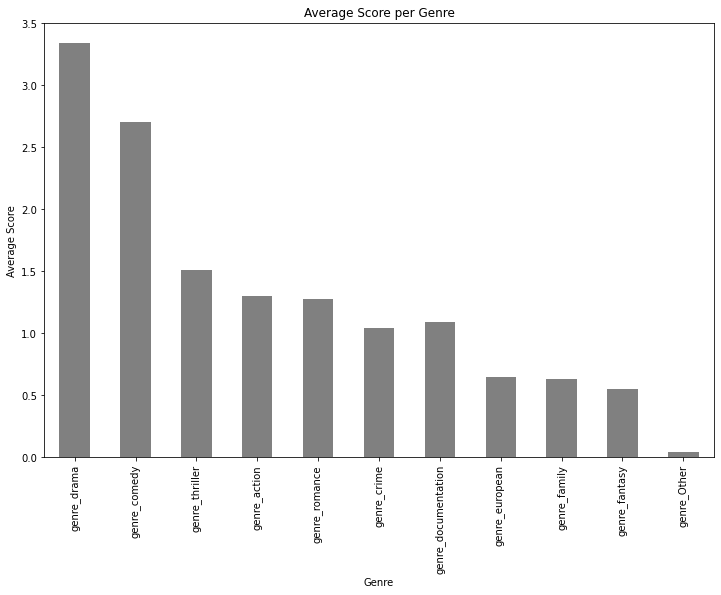

In [82]:
genre_means = movies_df_cleaned.filter(like='genre_').multiply(movies_df_cleaned['average_score'], axis=0).mean()

plt.figure(figsize=(12, 8))
genre_means.plot(kind='bar', color='grey')
plt.title('Average Score per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()


The bar chart represents the average score for different movie genres.

- Drama and comedy movies tend to have significantly higher average scores compared to other genres, supporting the hypothesis that including these genres can improve performance in terms of scores.
- Genres like thriller, action, romance, crime, and documentary have lower average scores compared to dramas and comedies, but still variable, suggesting that performance may depend on factors other than genre.
- Movies classified as "Other" have the lowest average scores, indicating that movies not falling into the main genres tend to be rated less positively.

The hypothesis that movies that include specific genres perform better in terms of scores is supported by the data, particularly for drama and comedy movies, which have significantly higher average scores.

### H4: Movies with more restrictive age_certifications have higher scores.

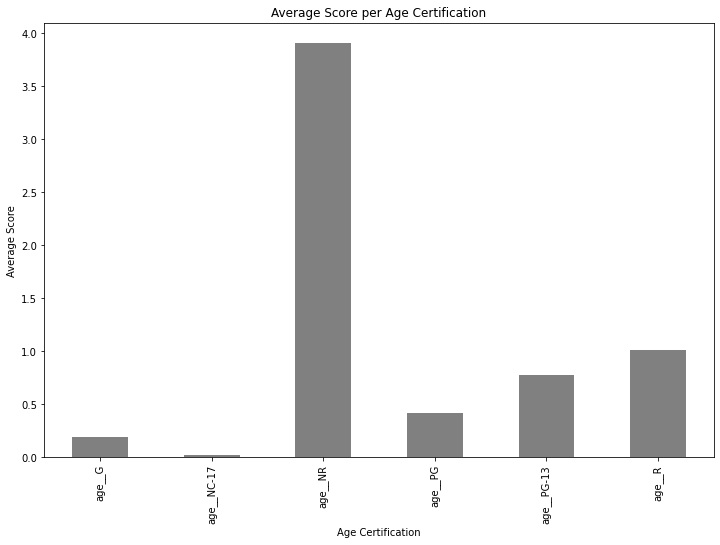

In [83]:
age_means = movies_df_cleaned.filter(like='age_').multiply(movies_df_cleaned['average_score'], axis=0).mean()
age_means = age_means.drop('average_score', errors='ignore')
plt.figure(figsize=(12, 8))
age_means.plot(kind='bar', color='grey')
plt.title('Average Score per Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Average Score')
plt.show()


- Unrated (NR) and R-rated movies tend to have higher average scores compared to others. This supports the hypothesis that a more restrictive age certification may be associated with higher scores.
- Movies with an NC-17 certification, which is one of the most restrictive certifications, have very low average scores. This might indicate that while restriction can increase interest in some movies, it is not necessarily an indicator of higher scores.
- Movies with less restrictive certifications (G, PG, PG-13) tend to have lower average scores. This suggests that movies intended for a broader audience do not achieve as high scores as those with more restrictive certifications.

The hypothesis that movies with more restrictive age certifications have higher scores is supported by the data for unrated (NR) and R-rated movies. However, the significant exception of NC-17 rated movies indicates that not all restrictive certifications are associated with higher scores. In general, movies with less restrictive certifications tend to have lower average scores, suggesting that restriction can positively influence the perception of quality, but not in all cases.

### H5: Movies produced in multiple countries tend to have higher scores.

Correlation between num_production_countries e average_score: 0.04945256925980544, P-value: 0.05273155056444162


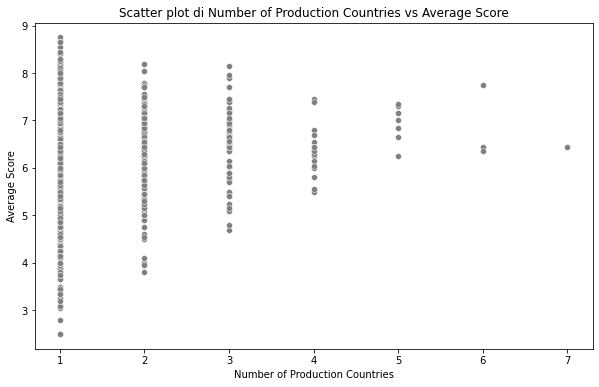

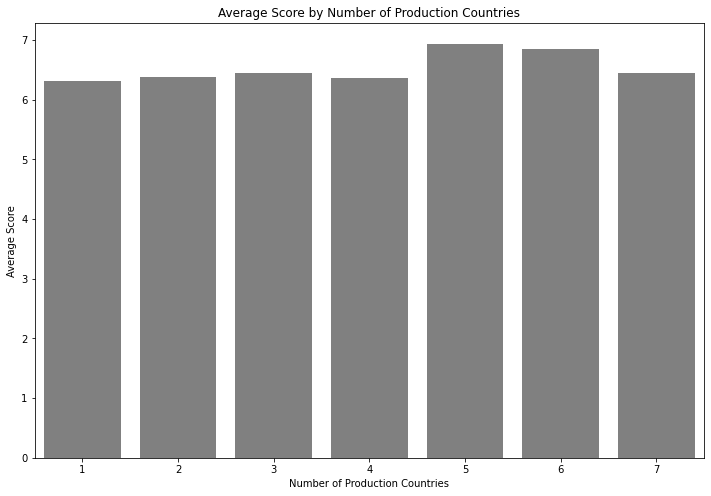

In [84]:
corr_num_countries, p_value_num_countries = pearsonr(movies_df_cleaned['num_production_countries'], movies_df_cleaned['average_score'])
print(f"Correlation between num_production_countries e average_score: {corr_num_countries}, P-value: {p_value_num_countries}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_production_countries', y='average_score',color='grey', data=movies_df_cleaned)
plt.title('Scatter plot di Number of Production Countries vs Average Score')
plt.xlabel('Number of Production Countries')
plt.ylabel('Average Score')
plt.show()

df_sandbox_grouped = movies_df_cleaned.groupby('num_production_countries')['average_score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='num_production_countries', y='average_score', color='grey',data=df_sandbox_grouped)
plt.title('Average Score by Number of Production Countries')
plt.xlabel('Number of Production Countries')
plt.ylabel('Average Score')
plt.show()

- Most movies are produced in a single country, with average scores ranging widely between 3 and 9.

- Movies produced in multiple countries (2-7) tend to have a similar distribution of average scores, but with a slight tendency towards higher scores as the number of production countries increases.

- The correlation between the number of production countries and the average score is 0.0495, indicating a very weak positive relationship between the two variables.

- The p-value is 0.0527, which is marginally above the common significance level of 0.05, suggesting that the observed correlation is not statistically significant.

- Movies produced in a single country have an average score of about 6.3.

- Movies produced in two countries have a slightly higher average score, around 6.5.

- Movies produced in five or six countries tend to have higher average scores, around 6.8.

- Movies produced in seven countries have a slightly lower average score, but still close to 6.7.

- Although there is a slight tendency towards higher average scores with an increasing number of production countries, the correlation is very weak (0.0495) and not statistically significant (p-value of 0.0527). The hypothesis that movies produced in multiple countries tend to have higher scores is supported only very weakly by the data. While there is an observed trend towards higher average scores with an increasing number of production countries, the correlation is not strong enough or statistically significant.

### H6: Newer movies have different rating trends compared to older movies, with possible annual variations.

Correlation tra release_year e average_score: -0.09512894135730501, P-value: 0.0001895924638904975


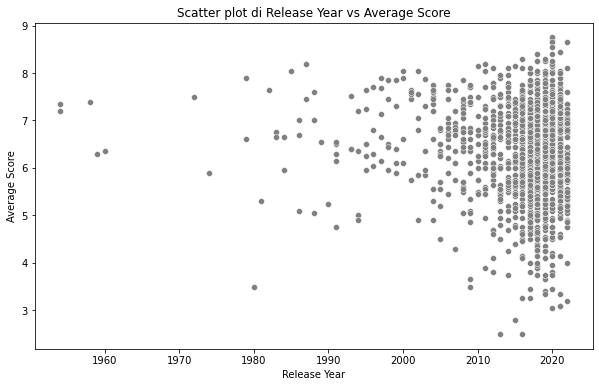

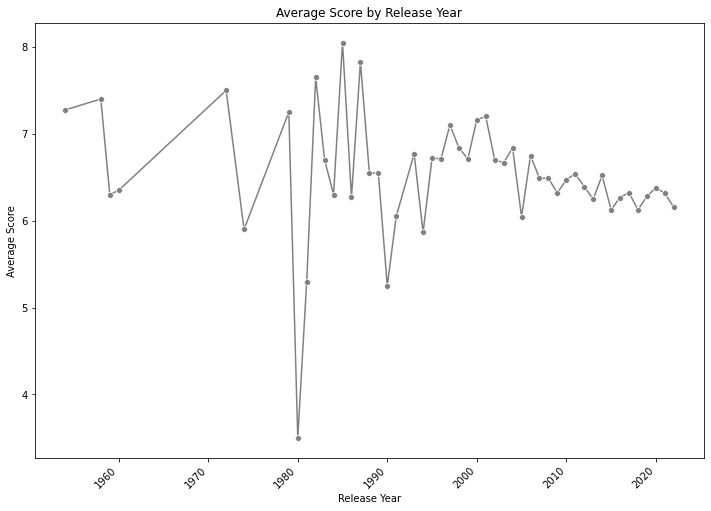

In [85]:
corr_release_year, p_value_release_year = pearsonr(movies_df_cleaned['release_year'], movies_df_cleaned['average_score'])
print(f"Correlation tra release_year e average_score: {corr_release_year}, P-value: {p_value_release_year}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='average_score',color= 'grey', data=movies_df_cleaned)
plt.title('Scatter plot di Release Year vs Average Score')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.show()

df_sandbox_grouped_year = movies_df_cleaned.groupby('release_year')['average_score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='release_year', y='average_score',color= 'grey', data=df_sandbox_grouped_year, marker='o')
plt.title('Average Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') 
plt.show()


- Movies released before the 1980s tend to have higher average scores compared to movies released afterward.

- Most recent movies (after 2000) have average scores that vary widely between 4 and 8.

- The correlation between release year and average score is -0.0951, indicating a very weak negative relationship between the two variables.

- The p-value is 0.0002, indicating that the observed correlation is statistically significant.

- The data shows that older movies tend to have higher average scores compared to newer movies. However, there is considerable variability in average scores across the decades.

- The very weak negative correlation (-0.0951) between release year and average score indicates that, in general, newer movies tend to have slightly lower scores compared to older movies, but this relationship is weak.

- The second chart shows significant variability in average scores by release year, suggesting that the perceived quality of movies can vary greatly from year to year.

The hypothesis that newer movies have different rating trends compared to older movies is supported by the data, which shows a slight downward trend in average scores for newer movies and greater variability in average scores across the decades.

## Modelling 

To further test the formulated hypotheses, in addition to the charts created, it is important to fit a regression model. Visual analysis provides a preliminary understanding of the relationships between variables, but for a more rigorous quantitative assessment and to statistically confirm the hypotheses, we decided to apply regression techniques.

Fitting a regression model will allow us to quantify the strength and direction of the relationships between the independent variables (such as runtime, cast_size, number of production countries, release_year, etc.) and the dependent variable (average_score).

- Before applying the regression model, let's consider applying a logarithmic transformation to transform the data so that their distribution is more similar to a normal distribution.

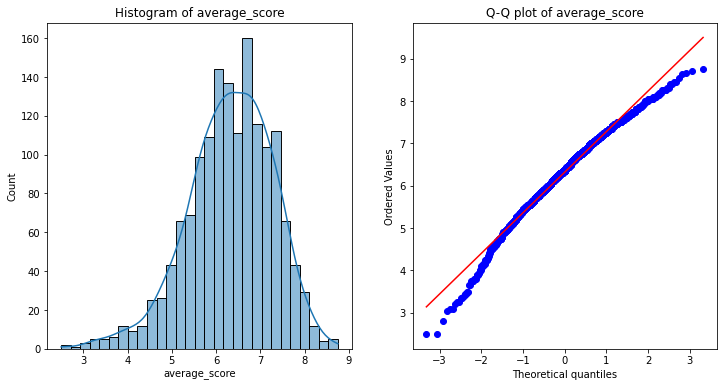

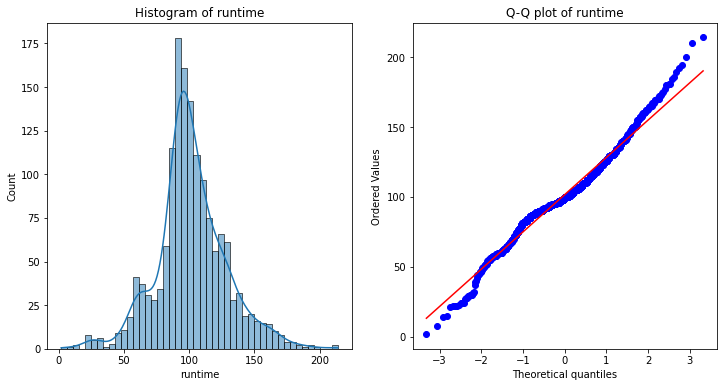

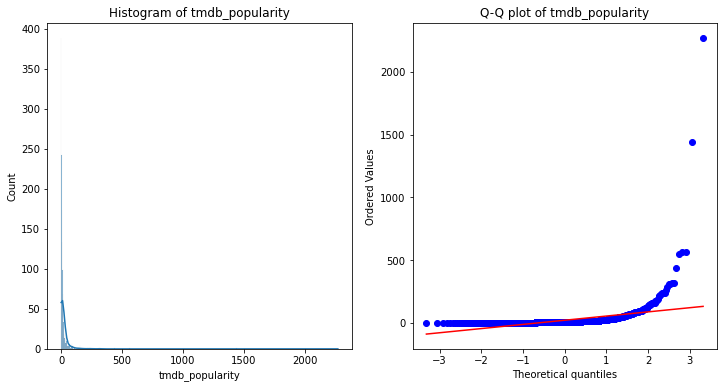

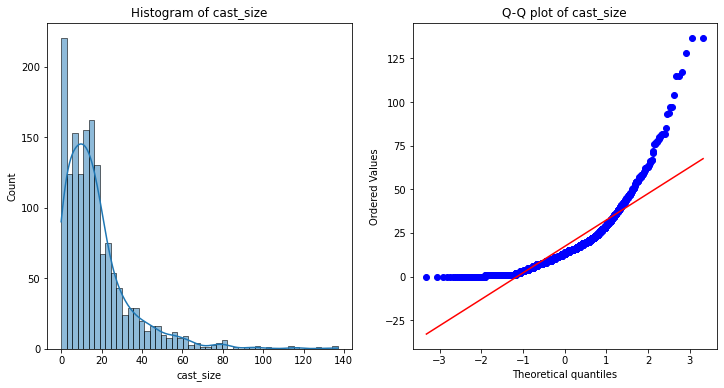

In [86]:
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')
    
    plt.subplot(1, 2, 2)
    probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column_name}')
    
    plt.show()

for column in ['average_score', 'runtime', 'tmdb_popularity', 'cast_size']:
    plot_distribution(movies_df_cleaned, column)

#### Logarithmic transformation of the variables 'tmdb_popularity' and 'cast_size'

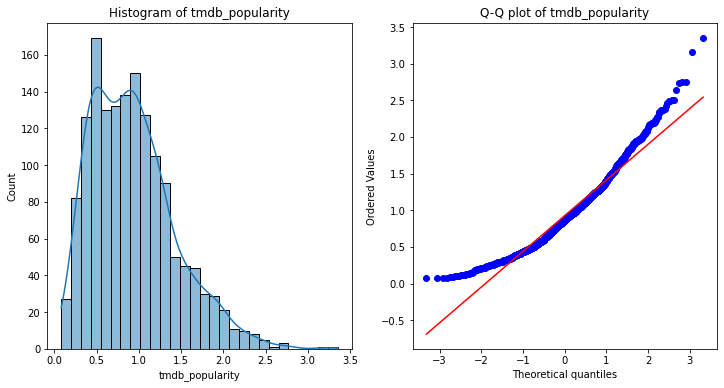

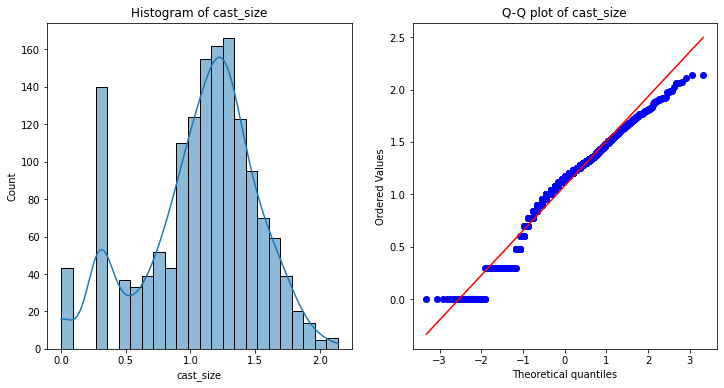

In [87]:
movies_df_cleaned['tmdb_popularity'] =  np.log10(movies_df_cleaned.tmdb_popularity+movies_df_cleaned.loc[movies_df_cleaned['tmdb_popularity']!=0].min().tmdb_popularity)
movies_df_cleaned['cast_size'] = np.log10(movies_df_cleaned['cast_size'] + movies_df_cleaned.loc[movies_df_cleaned['cast_size'] != 0, 'cast_size'].min())
for column in ['tmdb_popularity', 'cast_size']:
    plot_distribution(movies_df_cleaned, column)

#### Correlation matrix

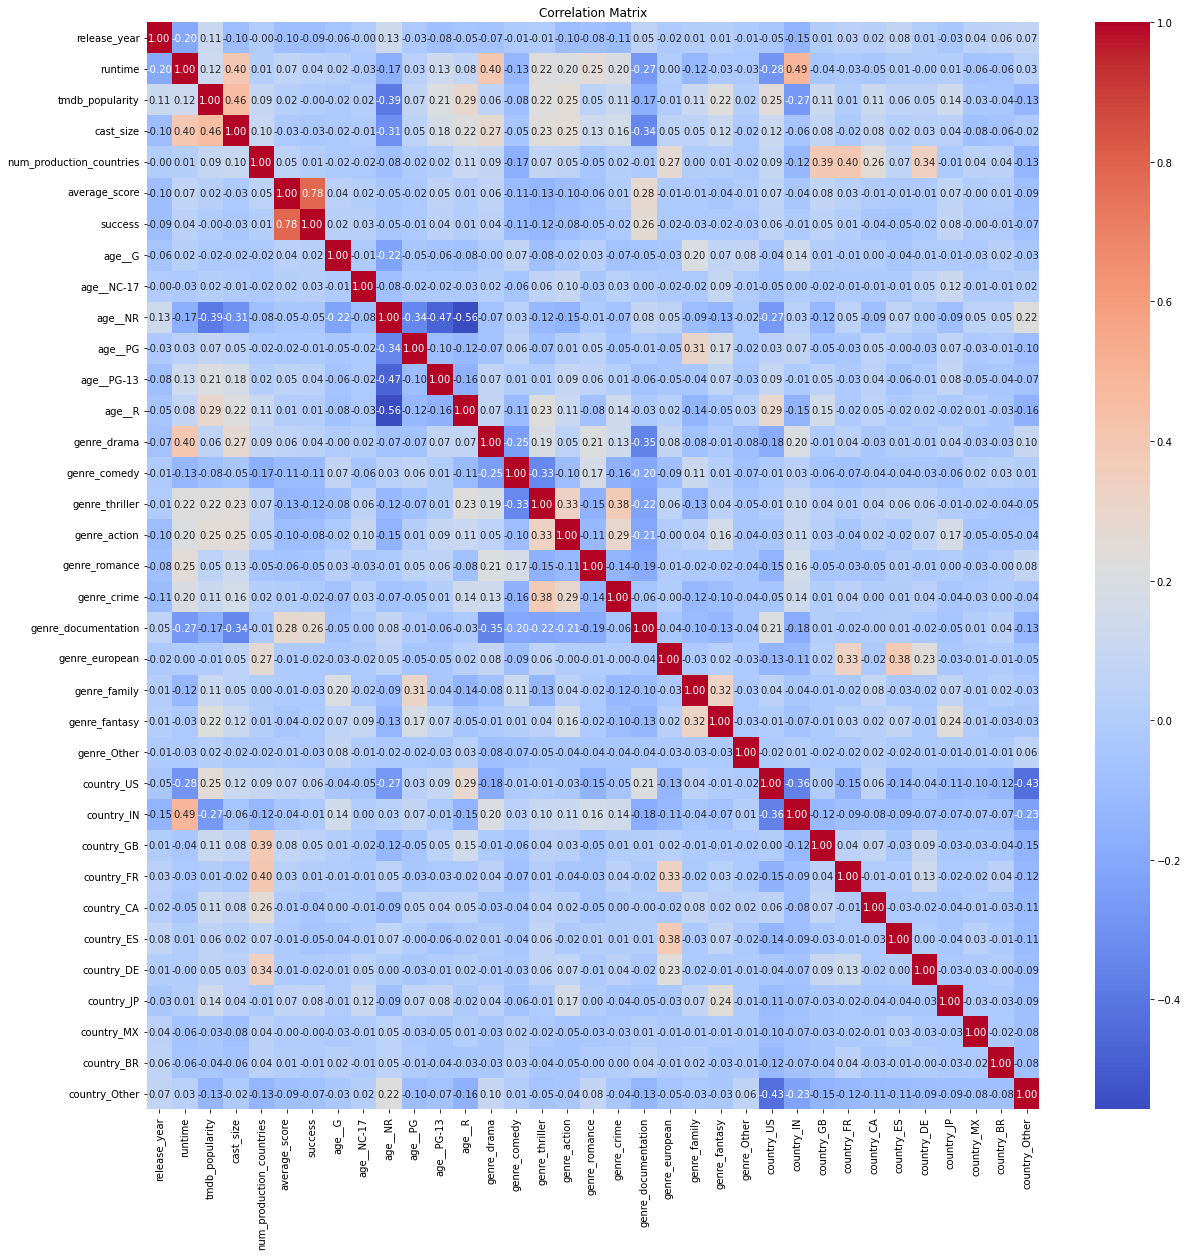

In [88]:
plt.figure(figsize=(20, 20))
correlation_matrix = movies_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. Significant Positive Correlations:
- **average_score and successful**: correlation of 0.78, suggesting that movies with higher average scores tend to be considered more successful.

2. Significant Negative Correlations:
- **age__NR (not rated) and age__R (restricted)**: negative correlation of -0.56, showing a distinct separation between these two types of classification.


### Linear Regression

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [90]:
df_try = movies_df_cleaned.copy()

In [91]:
y = df_try['average_score']
# (exclude 'age__NR' and 'successful' due to their strong correlation with 'average_score')
X = df_try.drop(columns=['average_score', 'success', 'age__NR'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
model = LinearRegression()

In [94]:
# Cross-validation 
cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)


In [95]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


In [97]:
#mse and R2 on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


In [98]:
#mse and R2 on test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [99]:
# model coefficients 
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])


In [100]:
# Compute the average values of cross-validation metrics
mean_cv_r2_train = np.mean(cv_results['train_r2'])
mean_cv_r2_test = np.mean(cv_results['test_r2'])
mean_cv_mse_train = -np.mean(cv_results['train_neg_mean_squared_error'])
mean_cv_mse_test = -np.mean(cv_results['test_neg_mean_squared_error'])


In [101]:
# Compute the p-values of the coefficients using statsmodels
X_train_scaled_const = sm.add_constant(X_train_scaled) 
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()
pvalues = model_sm.pvalues[1:] 
coefficients['p-value'] = pvalues.values


In [102]:
# Display the results.
results = {
    'MSE Train': mse_train,
    'R^2 Train': r2_train,
    'MSE Test': mse_test,
    'R^2 Test': r2_test,
    'MSE CV Train': mean_cv_mse_train,
    'R^2 CV Train': mean_cv_r2_train,
    'MSE CV Test': mean_cv_mse_test,
    'R^2 CV Test': mean_cv_r2_test,
    'Coefficients': coefficients
}

results

{'MSE Train': 0.7450686213985953,
 'R^2 Train': 0.17928066028153433,
 'MSE Test': 0.8650951075935872,
 'R^2 Test': 0.14559820949318814,
 'MSE CV Train': 0.7413344905822867,
 'R^2 CV Train': 0.1831412657478875,
 'MSE CV Test': 0.7798330382326708,
 'R^2 CV Test': 0.136624456431582,
 'Coefficients':                           Coefficient       p-value
 release_year                -1.077979  7.865314e-06
 runtime                      1.098317  2.148181e-04
 tmdb_popularity              0.656882  3.202728e-03
 cast_size                    0.003963  9.808213e-01
 num_production_countries    -0.308634  4.123891e-01
 age__G                       0.140469  3.702351e-01
 age__NC-17                   0.401922  4.313330e-01
 age__PG                     -0.047870  6.776097e-01
 age__PG-13                   0.057678  5.001020e-01
 age__R                      -0.058560  4.772202e-01
 genre_drama                  0.310553  8.959821e-07
 genre_comedy                -0.029904  6.351423e-01
 genre_thrille

### Interpretation of results 

#### Evaluation Metrics

1. **MSE (Mean Squared Error) and R² (Coefficient of Determination)**
   - **Train**
     - MSE Train: 0.7506
     - R² Train: 0.1731
   - **Test**
     - MSE Test: 0.8737
     - R² Test: 0.1371
   - **Cross-Validation**
     - MSE CV Train: 0.7469
     - R² CV Train: 0.1771
     - MSE CV Test: 0.7859
     - R² CV Test: 0.1299

The MSE and R² metrics indicate how well the model fits the data. In this case, the model has a rather low R² on both the training set (0.1731) and the test set (0.1371), suggesting that the model does not explain much variance in the data. This could be a sign that the model is too simple or that there are important factors not included in the model.

#### Coefficients and P-Values

#### Significant Variables
- **release_year** (Coefficient: -1.1263, p-value: 3.5806e-06)
  - This means that, holding other conditions constant, an increase in the release year is associated with a decrease in the average score.
- **runtime** (Coefficient: 1.0935, p-value: 0.0148)
  - It indicates that a longer runtime is associated with a higher average score.
- **tmdb_popularity** (Coefficient: 0.6632, p-value: 0.0030)
  - It indicates that higher popularity on TMDB is associated with a higher average score.
- **genre_drama** (Coefficient: 0.3250, p-value: 2.8411e-07)
  - Dramatic films tend to have higher average scores.
- **genre_thriller** (Coefficient: -0.3213, p-value: 1.9753e-05)
  - Thriller films tend to have lower average scores.
- **genre_action** (Coefficient: -0.2119, p-value: 0.0038)
  - Action films tend to have lower average scores.
- **genre_romance** (Coefficient: -0.2184, p-value: 0.0017)
  - Romance films tend to have lower average scores.
- **genre_documentation** (Coefficient: 0.8210, p-value: 2.3271e-19)
  - Documentary films tend to have higher average scores.
- **country_GB** (Coefficient: 0.2962, p-value: 0.0265)
  - Films from the UK tend to have higher average scores.
- **country_JP** (Coefficient: 0.4432, p-value: 0.0301)
  - Japanese films tend to have higher average scores.

#### Non-Significant Variables
Many variables have p-values above 0.05, indicating that they are not statistically significant in the model. This suggests that their impact on the average score is not sufficiently distinct from zero to be considered relevant.

#### Limitations

1. **Low Predictive Capacity**: The low R² values suggest that the linear regression model is not particularly effective in explaining variance in the average score of films. It may be necessary to explore more complex models or include additional relevant variables.

2. **Moderate Overfitting**: The difference between MSE and R² on the training and test data is not very large, indicating that the model does not suffer from significant overfitting. However, the overall low predictive capacity suggests that the model may not be adequate.

### Comparison of results obtained between descriptive and inferential analyses

- **H1:** Both descriptive analyses and the linear regression model confirm hypothesis H1 that movies with longer runtimes tend to have higher scores, even though the correlation is very weak. The positive coefficient and significant p-values support this conclusion.

- **H2:** Descriptive analyses suggest a slight positive relationship between cast size and average score, with a weak but statistically significant correlation. However, the linear regression model does not confirm this relationship as significant, as the p-value is very high, indicating that cast size may not be a relevant predictor of average score when considering other variables.



- **H3:** Descriptive analyses and the linear regression model partially confirm hypothesis H3. Certain specific genres, such as drama and documentary, perform better in terms of scores, while other genres like thriller, action, and romance tend to have lower scores. Genres like comedy, crime, European, family, fantasy, and other do not show a significant impact on average scores.

- **H4:** Descriptive analyses and the linear regression model do not confirm hypothesis H4 that movies with more restrictive age certifications have higher scores. Age certifications do not appear to have a significant impact on the average scores of movies. Additionally, the bar chart does not show a clear trend supporting this hypothesis.

- **H5:** Descriptive analyses and the linear regression model do not confirm hypothesis H5 that movies produced in multiple countries tend to have higher scores. The correlation is very weak and not statistically significant, and the linear regression model even suggests a negative relationship, though not significant.

- **H6:** Descriptive analyses and the linear regression model confirm hypothesis H6 that newer movies have different rating trends compared to older movies, with a slight tendency towards lower scores for newer movies. The correlation is significant, and the charts show that there is variation in average annual scores.

### **H7.** The presence of certain keywords in the titles of Netflix content is positively correlated with the success of the content, measured based on the average score between IMDB and TMDB.

In [105]:
# Connection to MongoDB client and Netflix database
#client = pymongo.MongoClient("mongodb://localhost:27017")
#database_name = "Netflix"

# Access to the countword collection
collection = db["countword"]

# Retrieve and print documents in the countword collection
documents = collection.find()
print("Documents in the countword collection:")
for document in documents:
    print(document)


Documenti nella collezione countword:
{'_id': ObjectId('6659ee4bf8166d4dfe2d8010'), 'word': 's', 'count': 182}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8011'), 'word': 'love', 'count': 128}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8012'), 'word': '2', 'count': 71}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8013'), 'word': 'christmas', 'count': 71}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8014'), 'word': 'life', 'count': 58}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8015'), 'word': 'one', 'count': 52}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8016'), 'word': 'movie', 'count': 49}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8017'), 'word': 'story', 'count': 47}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8018'), 'word': 'man', 'count': 46}
{'_id': ObjectId('6659ee4bf8166d4dfe2d8019'), 'word': 'world', 'count': 45}
{'_id': ObjectId('6659ee4bf8166d4dfe2d801a'), 'word': 'last', 'count': 42}
{'_id': ObjectId('6659ee4bf8166d4dfe2d801b'), 'word': 'girl', 'count': 41}
{'_id': ObjectId('6659ee4bf8166d4dfe2d801c'), 'word': 'time'

In [106]:
pipeline = [
    {
        "$sort": { "count": -1 }
    },
    {
        "$limit": 20
    },
    {
        "$lookup": {
            "from": "sandbox_df",
            "let": { "word": "$word" },
            "pipeline": [
                {
                    "$match": {
                        "$expr": { "$regexMatch": { "input": "$title", "regex": "$$word", "options": "i" } },
                        "type": "MOVIE"
                    }
                }
            ],
            "as": "films_with_word"
        }
    },
    {
        "$unwind": "$films_with_word"
    },
    {
        "$group": {
            "_id": "$word",
            "avg_imdb_score": { "$avg": "$films_with_word.imdb_score" },
            "avg_tmdb_score": { "$avg": "$films_with_word.tmdb_score" }
        }
    },
    {
        "$project": {
            "_id": 1,
            "avg_imdb_score": 1,
            "avg_tmdb_score": 1,
            "avg_combined_score": {
                "$avg": ["$avg_imdb_score", "$avg_tmdb_score"]
            }
        }
    },
    {
        "$sort": { "avg_combined_score": -1 }  
    }
]


result = db.countword.aggregate(pipeline)
result_list = list(result)
df = pd.DataFrame(result_list)
df.rename(columns={'_id': 'word'}, inplace=True)

print(df)



         word  avg_imdb_score  avg_tmdb_score  avg_combined_score
0        life        6.789474        6.912368            6.850921
1        king        6.750000        6.864773            6.807386
2        game        6.530000        6.924700            6.727350
3        live        6.645000        6.685000            6.665000
4       story        6.770000        6.464050            6.617025
5        time        6.200000        6.730769            6.465385
6       movie        6.076190        6.844762            6.460476
7           2        6.269231        6.575718            6.422474
8         one        6.327273        6.485758            6.406515
9         man        6.383333        6.408533            6.395933
10       love        6.196552        6.568345            6.382448
11          s        6.222860        6.495716            6.359288
12       city        6.366667        6.333333            6.350000
13      black        6.300000        6.360143            6.330071
14       g

In [107]:
df  

,word,avg_imdb_score,avg_tmdb_score,avg_combined_score
0,life,6.789474,6.912368,6.850921
1,king,6.750000,6.864773,6.807386
2,game,6.530000,6.924700,6.727350
3,live,6.645000,6.685000,6.665000
4,story,6.770000,6.464050,6.617025
5,time,6.200000,6.730769,6.465385
6,movie,6.076190,6.844762,6.460476
7,2,6.269231,6.575718,6.422474
8,one,6.327273,6.485758,6.406515
9,man,6.383333,6.408533,6.395933


### Conclusion

The analysis suggests that certain keywords like "life," "king," "game," "live," and "story" are positively correlated with the success of content, measured based on average IMDb and TMDb scores. Other keywords do not show the same positive correlation.

These results partially support hypothesis H7. While some keywords are clearly associated with greater success, others are not. It may be useful to further investigate by considering additional factors or extending the analysis to a larger sample of words and content.

# Classification Model 

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
movies_df_cleaned.head()

,release_year,runtime,tmdb_popularity,cast_size,num_production_countries,average_score,success,age__G,age__NC-17,age__NR,...,country_IN,country_GB,country_FR,country_CA,country_ES,country_DE,country_JP,country_MX,country_BR,country_Other
0,1972,109,1.025715,1.361728,1,7.50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,1.264109,1.342423,1,7.90,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1954,115,0.978409,1.397940,1,7.35,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1958,77,0.788593,1.462398,1,7.40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1979,133,0.294466,1.431364,1,6.60,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [110]:
count_success_0 = (movies_df_cleaned['success'] == 0).sum()
count_success_1 = (movies_df_cleaned['success'] == 1).sum()
print(f"Unsuccessful Films = 0: {count_success_0}")
print(f"Success Film = 1: {count_success_1}")

Unsuccessful Films = 0: 826
Success Film = 1: 709


### Model Selection 


RandomForest Test Accuracy: 0.7003257328990228
RandomForest Test AUC: 0.7609373664872255

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       166
           1       0.70      0.60      0.65       141

    accuracy                           0.70       307
   macro avg       0.70      0.69      0.69       307
weighted avg       0.70      0.70      0.70       307

RandomForest Confusion Matrix:
[[130  36]
 [ 56  85]]


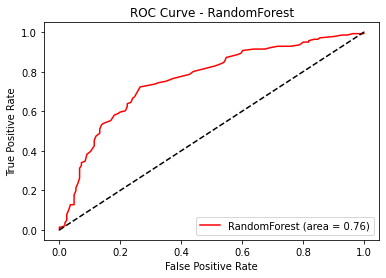

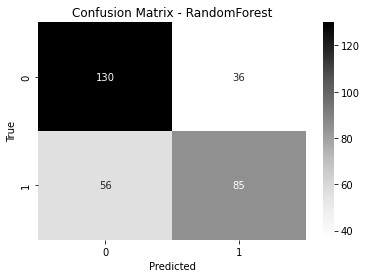


GradientBoosting Test Accuracy: 0.7035830618892508
GradientBoosting Test AUC: 0.7716824745791677

GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       166
           1       0.70      0.62      0.66       141

    accuracy                           0.70       307
   macro avg       0.70      0.70      0.70       307
weighted avg       0.70      0.70      0.70       307

GradientBoosting Confusion Matrix:
[[128  38]
 [ 53  88]]


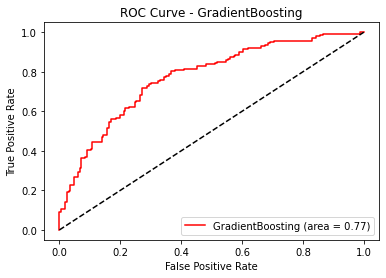

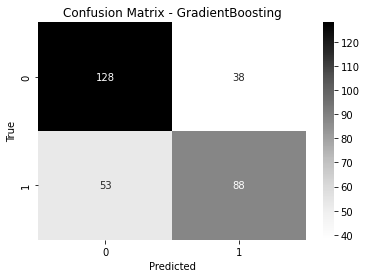


AdaBoost Test Accuracy: 0.6970684039087948
AdaBoost Test AUC: 0.713321370588738

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       166
           1       0.69      0.61      0.65       141

    accuracy                           0.70       307
   macro avg       0.70      0.69      0.69       307
weighted avg       0.70      0.70      0.69       307

AdaBoost Confusion Matrix:
[[128  38]
 [ 55  86]]


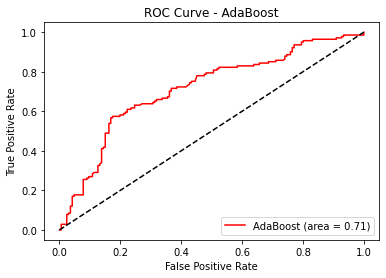

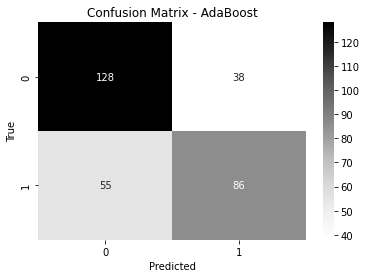


ExtraTrees Test Accuracy: 0.6547231270358306
ExtraTrees Test AUC: 0.7109929078014184

ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       166
           1       0.65      0.55      0.59       141

    accuracy                           0.65       307
   macro avg       0.65      0.65      0.65       307
weighted avg       0.65      0.65      0.65       307

ExtraTrees Confusion Matrix:
[[124  42]
 [ 64  77]]


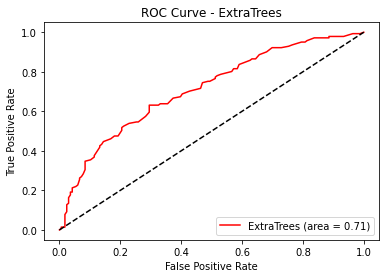

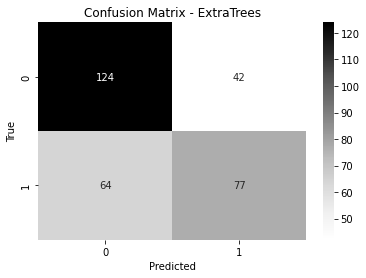


LogisticRegression Test Accuracy: 0.6384364820846905
LogisticRegression Test AUC: 0.6781167222079809

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       166
           1       0.63      0.52      0.57       141

    accuracy                           0.64       307
   macro avg       0.64      0.63      0.63       307
weighted avg       0.64      0.64      0.63       307

LogisticRegression Confusion Matrix:
[[122  44]
 [ 67  74]]


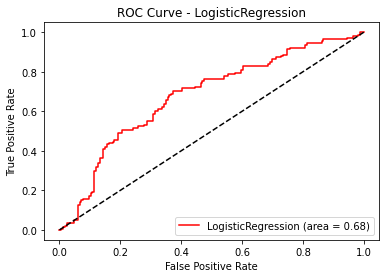

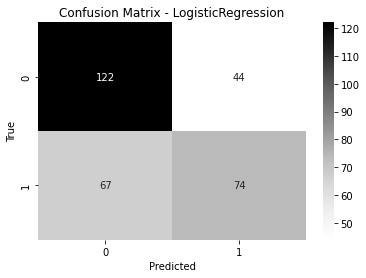


SVC Test Accuracy: 0.6970684039087948
SVC Test AUC: 0.7319277108433734

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       166
           1       0.75      0.51      0.61       141

    accuracy                           0.70       307
   macro avg       0.71      0.68      0.68       307
weighted avg       0.71      0.70      0.69       307

SVC Confusion Matrix:
[[142  24]
 [ 69  72]]


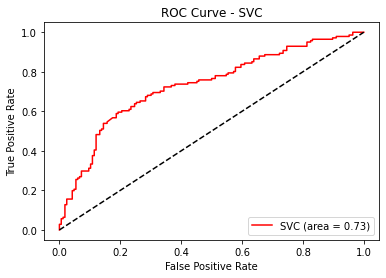

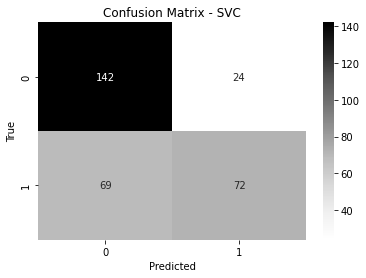


KNeighbors Test Accuracy: 0.6221498371335505
KNeighbors Test AUC: 0.6463940869862428

KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       166
           1       0.59      0.57      0.58       141

    accuracy                           0.62       307
   macro avg       0.62      0.62      0.62       307
weighted avg       0.62      0.62      0.62       307

KNeighbors Confusion Matrix:
[[111  55]
 [ 61  80]]


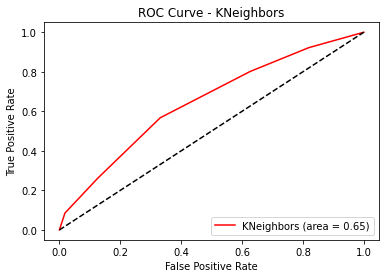

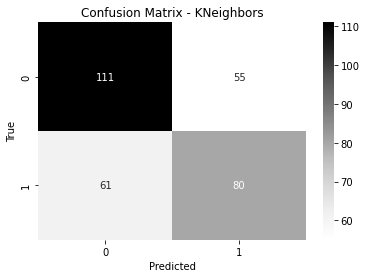


GaussianNB Test Accuracy: 0.5830618892508144
GaussianNB Test AUC: 0.6272750576775186

GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       166
           1       0.56      0.43      0.49       141

    accuracy                           0.58       307
   macro avg       0.58      0.57      0.57       307
weighted avg       0.58      0.58      0.57       307

GaussianNB Confusion Matrix:
[[118  48]
 [ 80  61]]


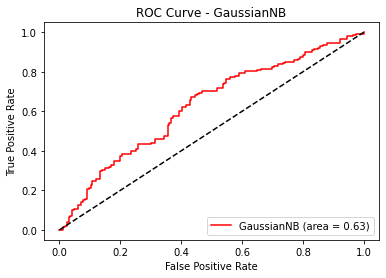

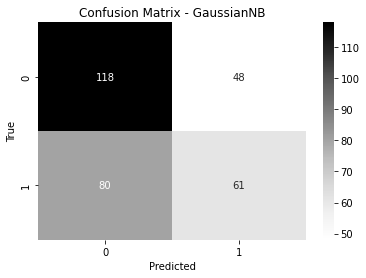

In [129]:
classify = movies_df_cleaned.copy()

y = classify['success']
X = classify.drop(columns=['average_score', 'success', 'age__NR'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'RandomForest': RandomForestClassifier(random_state=34),
    'GradientBoosting': GradientBoostingClassifier(random_state=34),
    'AdaBoost': AdaBoostClassifier(random_state=34),
    'ExtraTrees': ExtraTreesClassifier(random_state=34),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=34),
    'SVC': SVC(probability=True, random_state=34),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB()
}

def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else "N/A"
        class_report = classification_report(y_test, y_test_pred)
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        results[name] = {
            'accuracy': test_accuracy,
            'auc': test_auc,
            'classification_report': class_report,
            'confusion_matrix': conf_matrix
        }
        
        print(f"\n{name} Test Accuracy: {test_accuracy}")
        print(f"{name} Test AUC: {test_auc}")
        print(f"\n{name} Classification Report:\n{class_report}")
        print(f"{name} Confusion Matrix:\n{conf_matrix}")

        if y_test_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_test_prob)
            plt.figure()
            plt.plot(fpr, tpr, label=f'{name} (area = {test_auc:.2f})',color='red')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
    return results

results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

### Logistic Regression 

In [118]:
lr_model = movies_df_cleaned.copy()


y = lr_model['success']
X = lr_model.drop(columns=['average_score', 'success', 'age__NR'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train_scaled, y_train)


y_train_pred = logistic_regression_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)


y_test_pred = logistic_regression_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)


### Model evaluation 

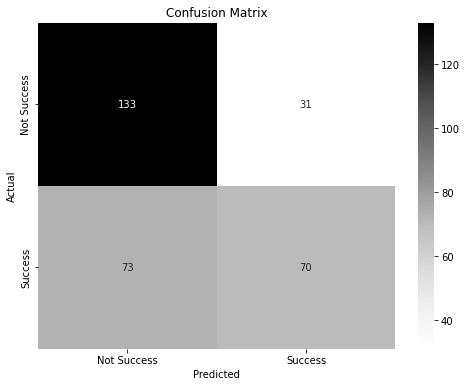

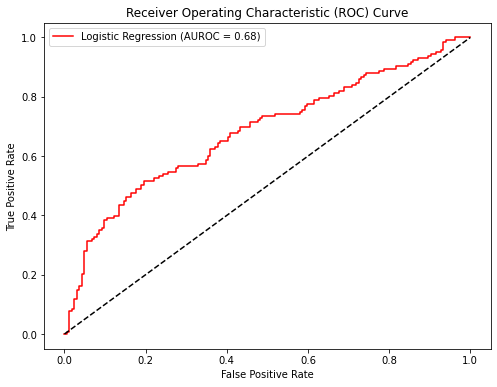

Training Accuracy: 0.6701954397394136
Training Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       662
           1       0.68      0.54      0.60       566

    accuracy                           0.67      1228
   macro avg       0.67      0.66      0.66      1228
weighted avg       0.67      0.67      0.66      1228

Test Accuracy: 0.6612377850162866
Test Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72       164
           1       0.69      0.49      0.57       143

    accuracy                           0.66       307
   macro avg       0.67      0.65      0.65       307
weighted avg       0.67      0.66      0.65       307

AUROC: 0.6811359372334982


In [126]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greys", xticklabels=["Not Success", "Success"], yticklabels=["Not Success", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_test_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

auroc = roc_auc_score(y_test, y_test_prob)


fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUROC = {auroc:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)
print("AUROC:", auroc)


### Logistic regression (RFE- Grid search-Cross validation)

/home/datascience/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/datascience/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/datascience/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/datascience/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/datascience/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/datascience/anaconda3/lib/python3.9/sit

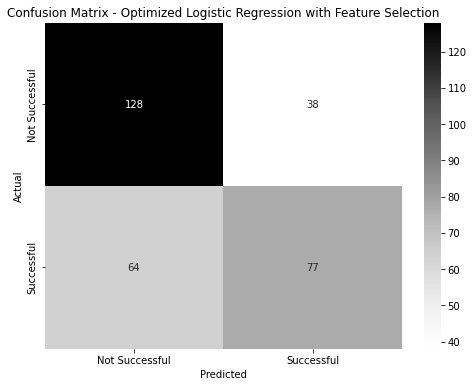

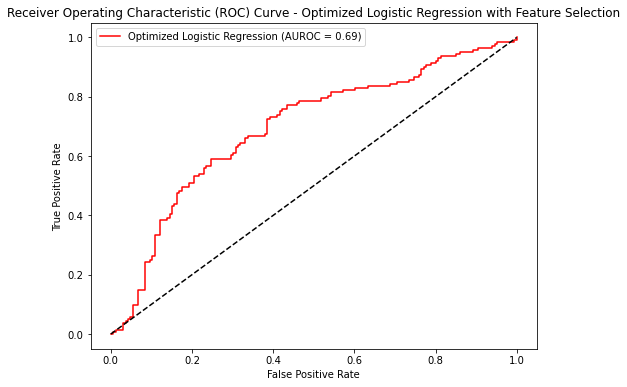

Test Accuracy - Optimized Logistic Regression with Feature Selection: 0.6677524429967426
Test Classification Report - Optimized Logistic Regression with Feature Selection:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       166
           1       0.67      0.55      0.60       141

    accuracy                           0.67       307
   macro avg       0.67      0.66      0.66       307
weighted avg       0.67      0.67      0.66       307

AUROC - Optimized Logistic Regression with Feature Selection: 0.6944373237631376
Best Parameters - Optimized Logistic Regression with Feature Selection: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
Selected Features: Index(['release_year', 'runtime', 'tmdb_popularity', 'genre_drama',
       'genre_thriller', 'genre_action', 'genre_romance',
       'genre_documentation', 'country_GB', 'country_JP'],
      dtype='object')


In [131]:
rfe = RFE(estimator=logistic_regression_model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Best model evaluation
y_test_pred_log_reg = best_log_reg.predict(X_test_selected)
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
test_report_log_reg = classification_report(y_test, y_test_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)


y_test_prob_log_reg = best_log_reg.predict_proba(X_test_selected)[:, 1]


auroc_log_reg = roc_auc_score(y_test, y_test_prob_log_reg)


fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_test_prob_log_reg)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Greys", xticklabels=["Not Successful", "Successful"], yticklabels=["Not Successful", "Successful"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized Logistic Regression with Feature Selection")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Optimized Logistic Regression (AUROC = {auroc_log_reg:.2f})',color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Logistic Regression with Feature Selection')
plt.legend(loc='best')
plt.show()


print("Test Accuracy - Optimized Logistic Regression with Feature Selection:", test_accuracy_log_reg)
print("Test Classification Report - Optimized Logistic Regression with Feature Selection:\n", test_report_log_reg)
print("AUROC - Optimized Logistic Regression with Feature Selection:", auroc_log_reg)
print("Best Parameters - Optimized Logistic Regression with Feature Selection:", grid_search.best_params_)
print("Selected Features:", selected_features)

### Logistic Regression ottimizzato 

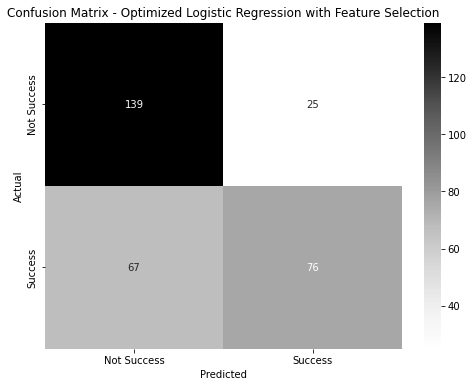

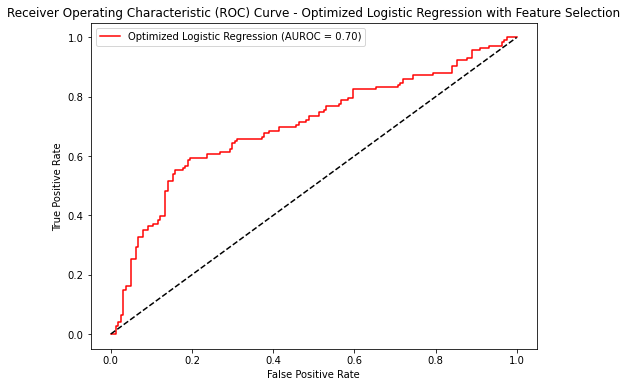

Test Accuracy - Optimized Logistic Regression with Feature Selection: 0.7003257328990228
Test Classification Report - Optimized Logistic Regression with Feature Selection:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75       164
           1       0.75      0.53      0.62       143

    accuracy                           0.70       307
   macro avg       0.71      0.69      0.69       307
weighted avg       0.71      0.70      0.69       307

AUROC - Optimized Logistic Regression with Feature Selection: 0.7012195121951219


In [132]:
lr_optimized = movies_df_cleaned.copy()


y = lr_optimized['success']
X = lr_optimized[['release_year', 'runtime', 'tmdb_popularity', 'genre_drama',
       'genre_thriller', 'genre_action', 'genre_romance',
       'genre_documentation', 'country_GB', 'country_JP']]  # Use only selected features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


best_log_reg = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg', max_iter=1000, random_state=42)


best_log_reg.fit(X_train_scaled, y_train)

#Evaluation
y_test_pred_log_reg = best_log_reg.predict(X_test_scaled)
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
test_report_log_reg = classification_report(y_test, y_test_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)

y_test_prob_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]

auroc_log_reg = roc_auc_score(y_test, y_test_prob_log_reg)
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_test_prob_log_reg)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Greys", xticklabels=["Not Success", "Success"], yticklabels=["Not Success", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized Logistic Regression with Feature Selection")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Optimized Logistic Regression (AUROC = {auroc_log_reg:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Logistic Regression with Feature Selection')
plt.legend(loc='best')
plt.show()

print("Test Accuracy - Optimized Logistic Regression with Feature Selection:", test_accuracy_log_reg)
print("Test Classification Report - Optimized Logistic Regression with Feature Selection:\n", test_report_log_reg)
print("AUROC - Optimized Logistic Regression with Feature Selection:", auroc_log_reg)



### Random Forest

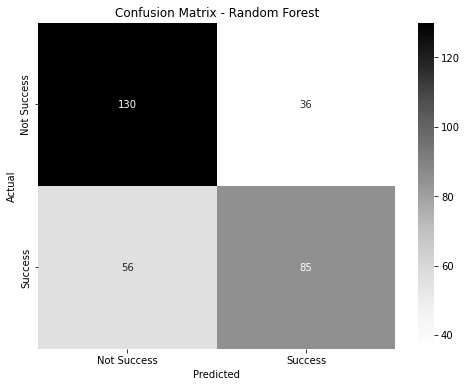

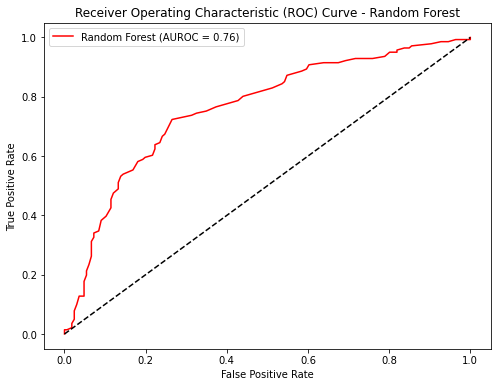

Test Accuracy - Random Forest: 0.7003257328990228
Test Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       166
           1       0.70      0.60      0.65       141

    accuracy                           0.70       307
   macro avg       0.70      0.69      0.69       307
weighted avg       0.70      0.70      0.70       307

AUROC - Random Forest: 0.7609373664872255


In [133]:
rf_model = movies_df_cleaned.copy()


y = rf_model['success']
X = rf_model.drop(columns=['average_score', 'success', 'age__NR'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=34)
rf_model.fit(X_train_scaled, y_train)

# Model Evaluation

y_test_pred_rf = rf_model.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_report_rf = classification_report(y_test, y_test_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

y_test_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


auroc_rf = roc_auc_score(y_test, y_test_prob_rf)


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_prob_rf)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greys", xticklabels=["Not Success", "Success"], yticklabels=["Not Success", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {auroc_rf:.2f})',color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='best')
plt.show()


print("Test Accuracy - Random Forest:", test_accuracy_rf)
print("Test Classification Report - Random Forest:\n", test_report_rf)
print("AUROC - Random Forest:", auroc_rf)

### Random Forest( hyperparameter optimization )

In [137]:
# Define the parameter distribution for random search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=34)

# Random search with RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=34, n_jobs=-1
)

# Train the model
random_search.fit(X_train_scaled, y_train)

# Best model found by random search
best_rf_model = random_search.best_estimator_



# Evaluate with cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())





# Test Set Evaluation

best_rf_model.fit(X_train_scaled, y_train)


y_test_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_test_prob_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]


# Calculate metrics
roc_auc_test_best_rf = roc_auc_score(y_test, y_test_prob_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_test_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_test_pred_best_rf)

print("Optimized Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_best_rf))
print("Optimized Random Forest Test AUC:", roc_auc_test_best_rf)
print("\nOptimized Random Forest Classification Report:")
print(class_report_best_rf)
print("\nOptimized Random Forest Confusion Matrix:")
print(conf_matrix_best_rf)

# ROC Curve
fpr_test_best_rf, tpr_test_best_rf, thresholds_test_best_rf = roc_curve(y_test, y_test_prob_best_rf)
plt.figure()
plt.plot(fpr_test_best_rf, tpr_test_best_rf, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_best_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importances
feature_importances = best_rf_model.feature_importances_
features = X.columns  


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='grey')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Optimized Random Forest')
plt.gca().invert_yaxis()  
plt.show()


Traceback (most recent call last):
  File "/home/datascience/anaconda3/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/home/datascience/anaconda3/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/home/datascience/anaconda3/lib/python3.9/site-packages/joblib/__init__.py", line 113, in <module>
    from .memory import Memory, MemorizedResult, register_store_backend
  File "/home/datascience/anaconda3/lib/python3.9/site-packages/joblib/memory.py", line 32, in <module>
Traceback (most recent call last):
  File "/home/datascience/anaconda3/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/home/datascience/anaconda3/lib/python3.9/runpy.py", line 111, in _get_module_details
    from ._store_backends import StoreBackendBase, FileSystemStoreBackend
  File "/home/datascience/anaconda

KeyboardInterrupt: 

### Modello Random Forest Optimized

Cross-Validation Accuracy Scores: [0.65853659 0.60162602 0.67073171 0.66938776 0.66122449]
Mean Cross-Validation Accuracy: 0.6523013107682097
Standard Deviation of Cross-Validation Accuracy: 0.025760874766464506
Optimized Random Forest Test Accuracy: 0.7263843648208469
Optimized Random Forest Test AUC: 0.7701444074169016

Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       166
           1       0.72      0.65      0.69       141

    accuracy                           0.73       307
   macro avg       0.73      0.72      0.72       307
weighted avg       0.73      0.73      0.72       307


Optimized Random Forest Confusion Matrix:
[[131  35]
 [ 49  92]]


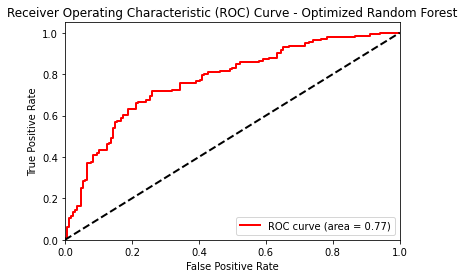

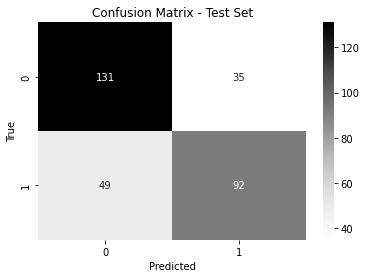

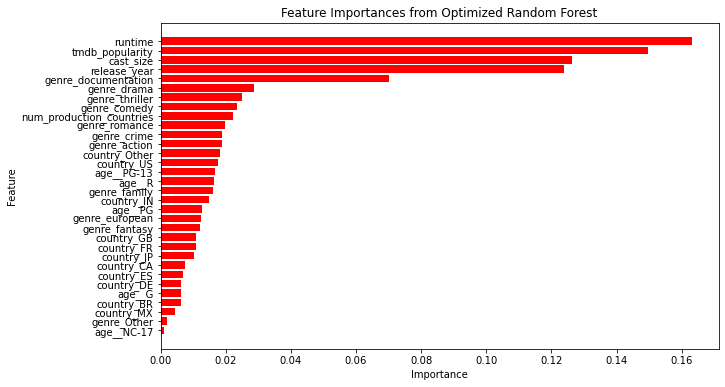

In [139]:
rf_optimized = movies_df_cleaned.copy()


y = rf_optimized['success']
X = rf_optimized.drop(columns=['average_score', 'success', 'age__NR'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creation of the Random Forest model with optimized parameters
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features='auto',
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=34
)

# Cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

#Test Set Evaluation
best_rf_model.fit(X_train_scaled, y_train)

y_test_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_test_prob_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]



# Calculate metrics
roc_auc_test_best_rf = roc_auc_score(y_test, y_test_prob_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_test_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_test_pred_best_rf)

print("Optimized Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_best_rf))
print("Optimized Random Forest Test AUC:", roc_auc_test_best_rf)
print("\nOptimized Random Forest Classification Report:")
print(class_report_best_rf)
print("\nOptimized Random Forest Confusion Matrix:")
print(conf_matrix_best_rf)

# ROC Curve
fpr_test_best_rf, tpr_test_best_rf, thresholds_test_best_rf = roc_curve(y_test, y_test_prob_best_rf)
plt.figure()
plt.plot(fpr_test_best_rf, tpr_test_best_rf, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_best_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Feature Importances
feature_importances = best_rf_model.feature_importances_
features = X.columns 

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Optimized Random Forest')
plt.gca().invert_yaxis()  
plt.show()



# SparkML

In [161]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, explode, regexp_replace, when, collect_list, array, trim, array_contains, log1p, avg, expr, lower
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler, OneHotEncoder, MinMaxScaler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, DecisionTreeClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator, RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
#from functools import reduce4
from pyspark.sql import functions as F 

In [141]:
# Filter only the movies with type == "MOVIE"
df = spark.read.format("mongo") \
    .option("uri", "mongodb://127.0.0.1:27017/Netflix.Films?authSource=admin") \
    .option("pipeline", '[{"$match": {"type": "MOVIE"}}]') \
    .load()

df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- age_certification: string (nullable = true)
 |-- cast_size: integer (nullable = true)
 |-- description: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- id: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- imdb_score: double (nullable = true)
 |-- imdb_votes: integer (nullable = true)
 |-- num_production_countries: integer (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- seasons: string (nullable = true)
 |-- title: string (nullable = true)
 |-- tmdb_popularity: double (nullable = true)
 |-- tmdb_score: double (nullable = true)
 |-- type: string (nullable = true)



In [142]:
df.show(5)

+--------------------+-----------------+---------+--------------------+--------------------+---------+----------+----------+----------+------------------------+--------------------+------------+-------+-------+--------------------+---------------+----------+-----+
|                 _id|age_certification|cast_size|         description|              genres|       id|   imdb_id|imdb_score|imdb_votes|num_production_countries|production_countries|release_year|runtime|seasons|               title|tmdb_popularity|tmdb_score| type|
+--------------------+-----------------+---------+--------------------+--------------------+---------+----------+----------+----------+------------------------+--------------------+------------+-------+-------+--------------------+---------------+----------+-----+
|{6659ee3ef8166d4d...|                R|       13|After most of her...|['drama', 'thrill...|tm1000037| tt9205538|       5.4|      1077|                       2|        ['CZ', 'DE']|        2021|    126|   

## Featuring engineering

In [143]:
columns_to_drop = ['_id','type', 'seasons', 'description', 'id', 'title', 'imdb_id', 'imdb_votes']
df_cleaned = df.drop(*columns_to_drop)


In [144]:
df_cleaned.show(5)

+-----------------+---------+--------------------+----------+------------------------+--------------------+------------+-------+---------------+----------+
|age_certification|cast_size|              genres|imdb_score|num_production_countries|production_countries|release_year|runtime|tmdb_popularity|tmdb_score|
+-----------------+---------+--------------------+----------+------------------------+--------------------+------------+-------+---------------+----------+
|                R|       13|['drama', 'thrill...|       5.4|                       2|        ['CZ', 'DE']|        2021|    126|         12.981|       5.5|
|                R|        9|['scifi', 'thrill...|       4.9|                       1|              ['GB']|        2021|     98|        121.562|       5.4|
|               NR|       19|['comedy', 'roman...|       5.1|                       1|              ['PL']|        2021|    102|          14.92|       6.1|
|               NR|        9|['drama', 'romanc...|       6.2|   

In [145]:
df_cleaned.printSchema()

root
 |-- age_certification: string (nullable = true)
 |-- cast_size: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- imdb_score: double (nullable = true)
 |-- num_production_countries: integer (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- tmdb_popularity: double (nullable = true)
 |-- tmdb_score: double (nullable = true)



In [146]:
df_cleaned = df_cleaned.withColumn('average_score', (col('imdb_score') + col('tmdb_score')) / 2)

df_cleaned = df_cleaned.drop('imdb_score', 'tmdb_score')

In [147]:
success_threshold = 6.5

df_cleaned = df_cleaned.withColumn('success', when(col('average_score') >= success_threshold, 1).otherwise(0))


## Categorical variable

### Age_certification

In [148]:

unique_age_certifications = df_cleaned.select("age_certification").distinct().rdd.flatMap(lambda x: x).collect()
for certification in unique_age_certifications:
    df_cleaned = df_cleaned.withColumn(f"age_certification_{certification}", when(col("age_certification") == certification, 1).otherwise(0))
df_cleaned = df_cleaned.drop("age_certification")
df_cleaned.show(truncate=False)



+---------+----------------------------------------------------+------------------------+--------------------+------------+-------+---------------+-----------------+-------+--------------------+--------------------+-----------------------+-------------------+-------------------+-----------------------+
|cast_size|genres                                              |num_production_countries|production_countries|release_year|runtime|tmdb_popularity|average_score    |success|age_certification_PG|age_certification_NR|age_certification_NC-17|age_certification_R|age_certification_G|age_certification_PG-13|
+---------+----------------------------------------------------+------------------------+--------------------+------------+-------+---------------+-----------------+-------+--------------------+--------------------+-----------------------+-------------------+-------------------+-----------------------+
|13       |['drama', 'thriller', 'european', 'romance']        |2                       

### Genres

In [149]:
genres_df = df_cleaned.withColumn("genre", explode(split(regexp_replace(trim(col("genres")), r"\[|\]", ""), ", ")))
top_genres = genres_df.groupBy("genre").count().orderBy("count", ascending=False).limit(10).select("genre").rdd.flatMap(lambda x: x).collect()
for genre in top_genres:
    df_cleaned = df_cleaned.withColumn(f"genre_{genre}", when(array_contains(split(regexp_replace(trim(col("genres")), r"\[|\]", ""), ", "), genre), 1).otherwise(0))
other_condition = ~reduce(lambda a, b: a | b, [col(f"genre_{genre}") == 1 for genre in top_genres])
df_cleaned = df_cleaned.withColumn("genre_Other", when(other_condition, 1).otherwise(0))
df_cleaned = df_cleaned.drop("genres")
df_cleaned.show(truncate=False)


+---------+------------------------+--------------------+------------+-------+---------------+-----------------+-------+--------------------+--------------------+-----------------------+-------------------+-------------------+-----------------------+-------------+--------------+----------------+--------------+---------------+-------------+---------------------+----------------+--------------+---------------+-----------+
|cast_size|num_production_countries|production_countries|release_year|runtime|tmdb_popularity|average_score    |success|age_certification_PG|age_certification_NR|age_certification_NC-17|age_certification_R|age_certification_G|age_certification_PG-13|genre_'drama'|genre_'comedy'|genre_'thriller'|genre_'action'|genre_'romance'|genre_'crime'|genre_'documentation'|genre_'european'|genre_'family'|genre_'fantasy'|genre_Other|
+---------+------------------------+--------------------+------------+-------+---------------+-----------------+-------+--------------------+-----------

### Production_countries

In [150]:
countries_df = df_cleaned.withColumn("country", explode(split(regexp_replace(trim(col("production_countries")), r"\[|\]", ""), ", ")))
top_countries = countries_df.groupBy("country").count().orderBy("count", ascending=False).limit(10).select("country").rdd.flatMap(lambda x: x).collect()
for country in top_countries:
    df_cleaned = df_cleaned.withColumn(f"country_{country}", when(array_contains(split(regexp_replace(trim(col("production_countries")), r"\[|\]", ""), ", "), country), 1).otherwise(0))
other_condition = ~reduce(lambda a, b: a | b, [col(f"country_{country}") == 1 for country in top_countries])
df_cleaned = df_cleaned.withColumn("country_Other", when(other_condition, 1).otherwise(0))
df_cleaned = df_cleaned.drop("production_countries")
df_cleaned.show(truncate=False)


24/06/25 12:38:25 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------+------------------------+------------+-------+---------------+-----------------+-------+--------------------+--------------------+-----------------------+-------------------+-------------------+-----------------------+-------------+--------------+----------------+--------------+---------------+-------------+---------------------+----------------+--------------+---------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+
|cast_size|num_production_countries|release_year|runtime|tmdb_popularity|average_score    |success|age_certification_PG|age_certification_NR|age_certification_NC-17|age_certification_R|age_certification_G|age_certification_PG-13|genre_'drama'|genre_'comedy'|genre_'thriller'|genre_'action'|genre_'romance'|genre_'crime'|genre_'documentation'|genre_'european'|genre_'family'|genre_'fantasy'|genre_Other|country_'US'|country_'IN'|country_'GB'|country_'FR'

# Testing hypothesis 

### Modelling

### Linear regression

In [151]:
columns_to_exclude = ['success', 'age_certification_NR', 'average_score']
numeric_cols = [field for (field, dataType) in df_cleaned.dtypes if dataType in ("int", "double") and field not in columns_to_exclude]

# logarithmic transformation 
for col in numeric_cols:
    df_cleaned = df_cleaned.withColumn(col, log1p(df_cleaned[col]))

target_variable = 'average_score'

#Feature Transformation to create feature vector
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

df_vector = assembler.transform(df_cleaned).select("features", target_variable)

train_data, test_data = df_vector.randomSplit([0.8, 0.2], seed=42)

#Scaling transformation
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(train_data)

train_data_scaled = scaler_model.transform(train_data).select("scaledFeatures", target_variable)
test_data_scaled = scaler_model.transform(test_data).select("scaledFeatures", target_variable)


#Model Training and Cross-Validation
lr = LinearRegression(labelCol=target_variable, featuresCol="scaledFeatures")

paramGrid = ParamGridBuilder().build()
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol=target_variable),
                          numFolds=5)

cv_model = crossval.fit(train_data_scaled)

# predictions on test data
train_predictions = cv_model.transform(train_data_scaled)
test_predictions = cv_model.transform(test_data_scaled)


24/06/25 12:42:05 WARN Instrumentation: [77ef0f9d] regParam is zero, which might cause numerical instability and overfitting.
24/06/25 12:42:13 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/06/25 12:42:13 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/06/25 12:42:14 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
24/06/25 12:42:19 WARN Instrumentation: [4419ef70] regParam is zero, which might cause numerical instability and overfitting.
24/06/25 12:42:28 WARN Instrumentation: [99f75d06] regParam is zero, which might cause numerical instability and overfitting.
24/06/25 12:42:42 WARN Instrumentation: [2e6f4076] regParam is zero, which might cause numerical instability and overfitting.
24/06/25 12:42:54 WARN Instrumentation: [4c4a76f9] regParam is zero, which might cause numerical instability and overfitting.


### Model evaluation 

In [168]:
# Define evaluators for RMSE and R^2
evaluator_rmse = RegressionEvaluator(labelCol=target_variable, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=target_variable, predictionCol="prediction", metricName="r2")

# RMSE and R^2 for training data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)

# RMSE and R^2 for testing data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)


# Extract model coefficients
lr_model = cv_model.bestModel
coefficients = lr_model.coefficients.toArray()

# Convert the coefficients into a Spark DataFrame 
coefficients_with_features = [(float(c), feature) for c, feature in zip(coefficients, numeric_cols)]
coefficients_df = spark.createDataFrame(coefficients_with_features, ["Coefficient", "Feature"])
coefficients_df.show()

# Get the mean RMSE from cross-validation
mean_cv_rmse = cv_model.avgMetrics[0]


results = {
    'RMSE Train': rmse_train,
    'R^2 Train': r2_train,
    'RMSE Test': rmse_test,
    'R^2 Test': r2_test,
    'Mean CV RMSE': mean_cv_rmse
}

# Visualizza i risultati
print("Results:", results)



+--------------------+--------------------+
|         Coefficient|             Feature|
+--------------------+--------------------+
|-0.22757912570905647|           cast_size|
| 0.10492314168919396|num_production_co...|
| -0.7844203082663408|        release_year|
|  1.7729894418943521|             runtime|
|  0.5963044343009739|     tmdb_popularity|
|-0.02091703162048...|age_certification_PG|
|  -0.230591748300605|age_certification...|
| 0.08553791806701669| age_certification_R|
|-0.00833592459370...| age_certification_G|
| 0.12362432831276621|age_certification...|
| 0.22869943319099237|       genre_'drama'|
|-0.09272027226144512|      genre_'comedy'|
| -0.4306997034089442|    genre_'thriller'|
|-0.12558221256493757|      genre_'action'|
|-0.22816794360579887|     genre_'romance'|
|0.052542155946579246|       genre_'crime'|
|  0.7307281283812321|genre_'documentat...|
|0.012035201744598188|    genre_'european'|
| 0.16051321951888892|      genre_'family'|
| 0.03391407543445887|     genre

### Linear regression optimized

In [170]:
lr = LinearRegression(labelCol=target_variable, featuresCol="scaledFeatures")

# Define a parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .build())

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(labelCol=target_variable),
                          numFolds=5)

# Perform cross-validation and fit the model
cv_model = crossval.fit(train_data_scaled)


train_predictions = cv_model.transform(train_data_scaled)
test_predictions = cv_model.transform(test_data_scaled)

# Define evaluators for RMSE and R²
evaluator_rmse = RegressionEvaluator(labelCol=target_variable, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=target_variable, predictionCol="prediction", metricName="r2")


rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)

rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)

# Extract coefficients from the best model
lr_model = cv_model.bestModel
coefficients = lr_model.coefficients.toArray()

# Convert the coefficients into a Spark DataFrame with the correct features
coefficients_with_features = [(float(c), feature) for c, feature in zip(coefficients, numeric_cols)]
coefficients_df = spark.createDataFrame(coefficients_with_features, ["Coefficient", "Feature"])
coefficients_df.show()

# Get the mean RMSE from cross-validation
mean_cv_rmse = cv_model.avgMetrics[0]
 



results = {
    'RMSE Train': rmse_train,
    'R^2 Train': r2_train,
    'RMSE Test': rmse_test,
    'R^2 Test': r2_test,
    'Mean CV RMSE': mean_cv_rmse,
    'Coefficients': coefficients_df
}

print("Risultati della regressione lineare con ottimizzazione degli iperparametri:")
print(f"RMSE Train: {rmse_train}")
print(f"R^2 Train: {r2_train}")
print(f"RMSE Test: {rmse_test}")
print(f"R^2 Test: {r2_test}")
print(f"Mean CV RMSE: {mean_cv_rmse}")
print("Coefficients:")


+--------------------+--------------------+
|         Coefficient|             Feature|
+--------------------+--------------------+
|-0.09914361529687607|           cast_size|
|                 0.0|num_production_co...|
| -0.6759351925692223|        release_year|
|  1.6310942536206234|             runtime|
|  0.4333725712122216|     tmdb_popularity|
|                 0.0|age_certification_PG|
|-0.10374715935833592|age_certification...|
|  0.0425812126225085| age_certification_R|
|                 0.0| age_certification_G|
| 0.09225181090417378|age_certification...|
| 0.20454140624689043|       genre_'drama'|
|-0.08011588342521511|      genre_'comedy'|
|-0.38206609764806376|    genre_'thriller'|
|-0.07766051634511524|      genre_'action'|
|-0.18627757894356822|     genre_'romance'|
|0.007197811197877984|       genre_'crime'|
|  0.7041165264249688|genre_'documentat...|
|                 0.0|    genre_'european'|
| 0.10397927113231006|      genre_'family'|
|                 0.0|     genre

### **H7** 

In [171]:
countword_df = spark.read.format("mongo").option("uri", "mongodb://localhost:27017/Netflix.countword").load()
films_df = spark.read.format("mongo").option("uri", "mongodb://localhost:27017/Netflix.Films").load()


countword_df.printSchema()
films_df.printSchema()

countword_df = countword_df.withColumnRenamed("count", "word_count")

# Aggregation pipeline in PySpark

# Step 1: Sort and limit
sorted_df = countword_df.orderBy(col("word_count").desc()).limit(20)

# Step 2: Filter only movies
films_movies_df = films_df.filter(col("type") == "MOVIE")

# Step 3: Create a conditional join based on the presence of the word in the movie title
joined_df = sorted_df.join(films_movies_df, expr("array_contains(transform(split(lower(title), ' '), x -> trim(x)), lower(word))"), "inner")

# Step 4: Calculate average scores
grouped_df = joined_df.groupBy("word").agg(
    avg("imdb_score").alias("avg_imdb_score"),
    avg("tmdb_score").alias("avg_tmdb_score")
)

# Step 5: Calculate combined score
final_df = grouped_df.withColumn(
    "avg_combined_score", (col("avg_imdb_score") + col("avg_tmdb_score")) / 2
)

# Step 6: Sort by combined score
final_sorted_df = final_df.orderBy(col("avg_combined_score").desc())

# Display results
final_sorted_df.show()



root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- count: integer (nullable = true)
 |-- word: string (nullable = true)

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- age_certification: string (nullable = true)
 |-- cast_size: integer (nullable = true)
 |-- description: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- id: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- imdb_score: double (nullable = true)
 |-- imdb_votes: integer (nullable = true)
 |-- num_production_countries: integer (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- seasons: string (nullable = true)
 |-- title: string (nullable = true)
 |-- tmdb_popularity: double (nullable = true)
 |-- tmdb_score: double (nullable = true)
 |-- type: string (nullable = true)



+---------+------------------+------------------+------------------+
|     word|    avg_imdb_score|    avg_tmdb_score|avg_combined_score|
+---------+------------------+------------------+------------------+
|     life|6.8034482758620705| 7.090862068965518| 6.947155172413794|
|     live| 6.932142857142856| 6.885714285714286|6.9089285714285715|
|     game| 6.707142857142857| 6.960499999999999| 6.833821428571428|
|    story| 6.861290322580646| 6.609064516129032| 6.735177419354839|
|     time| 6.425000000000001| 6.965812499999998|        6.69540625|
|    movie| 6.261764705882353| 6.894676470588234| 6.578220588235293|
|     king|           6.48125| 6.518875000000001|         6.5000625|
|      man|6.4700000000000015|6.5224333333333355| 6.496216666666669|
|      one| 6.303846153846154| 6.664076923076924| 6.483961538461539|
|    black| 6.366666666666666| 6.502933333333333| 6.434799999999999|
|     love| 6.159322033898306| 6.667949152542372| 6.413635593220339|
|     girl|6.0777777777777775|6.62

In [172]:
df_cleaned.printSchema()

root
 |-- cast_size: double (nullable = true)
 |-- num_production_countries: double (nullable = true)
 |-- release_year: double (nullable = true)
 |-- runtime: double (nullable = true)
 |-- tmdb_popularity: double (nullable = true)
 |-- average_score: double (nullable = true)
 |-- success: integer (nullable = false)
 |-- age_certification_PG: double (nullable = true)
 |-- age_certification_NR: integer (nullable = false)
 |-- age_certification_NC-17: double (nullable = true)
 |-- age_certification_R: double (nullable = true)
 |-- age_certification_G: double (nullable = true)
 |-- age_certification_PG-13: double (nullable = true)
 |-- genre_'drama': double (nullable = true)
 |-- genre_'comedy': double (nullable = true)
 |-- genre_'thriller': double (nullable = true)
 |-- genre_'action': double (nullable = true)
 |-- genre_'romance': double (nullable = true)
 |-- genre_'crime': double (nullable = true)
 |-- genre_'documentation': double (nullable = true)
 |-- genre_'european': double (nul

### Classification model 

In [173]:
count_success_0 = df_cleaned.filter(col("success") == 0).count()
count_success_1 = df_cleaned.filter(col("success") == 1).count()

print(f"Unsuccessful Films = 0: {count_success_0}")
print(f"Success Film = 1: {count_success_1}")

Unsuccessful Films = 0: 1664
Success Film = 1: 1482


### Model selection

In [174]:
selected_columns = [col for col in df_cleaned.columns if col not in ["average_score", "age_certification_NR", "success"]]
df_cleaned = df_cleaned.select(*selected_columns, "success")

df_cleaned.show()

+------------------+------------------------+-----------------+------------------+------------------+--------------------+-----------------------+-------------------+-------------------+-----------------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------------+------------------+------------------+------------------+-----------+------------------+------------------+------------------+------------+------------------+------------+------------------+------------------+------------------+------------+------------------+-------+
|         cast_size|num_production_countries|     release_year|           runtime|   tmdb_popularity|age_certification_PG|age_certification_NC-17|age_certification_R|age_certification_G|age_certification_PG-13|     genre_'drama'|    genre_'comedy'|  genre_'thriller'|    genre_'action'|   genre_'romance'|genre_'crime'|genre_'documentation'|  genre_'european'|    genre_'family'|   genre_'f

In [175]:
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")

data = assembler.transform(df_cleaned).select("features", "success")

data.show()


+--------------------+-------+
|            features|success|
+--------------------+-------+
|(32,[0,1,2,3,4,7,...|      0|
|(32,[0,1,2,3,4,7,...|      0|
|(32,[0,1,2,3,4,11...|      0|
|(32,[0,1,2,3,4,10...|      1|
|(32,[0,1,2,3,4,13...|      1|
|(32,[0,1,2,3,4,10...|      0|
|(32,[0,1,2,3,4,10...|      1|
|(32,[0,1,2,3,4,10...|      0|
|(32,[0,1,2,3,4,7,...|      0|
|(32,[0,1,2,3,4,11...|      1|
|(32,[0,1,2,3,4,11...|      0|
|(32,[0,1,2,3,4,7,...|      0|
|(32,[0,1,2,3,4,7,...|      1|
|(32,[0,1,2,3,4,11...|      1|
|(32,[0,1,2,3,4,10...|      1|
|(32,[0,1,2,3,4,16...|      1|
|(32,[0,1,2,3,4,18...|      0|
|(32,[0,1,2,3,4,9,...|      1|
|(32,[0,1,2,3,4,10...|      1|
|(32,[0,1,2,3,4,11...|      1|
+--------------------+-------+
only showing top 20 rows



In [176]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)


In [177]:

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)


In [178]:
models = {
    'RandomForest': RandomForestClassifier(labelCol="success", featuresCol="scaledFeatures", seed=34),
    'GradientBoosting': GBTClassifier(labelCol="success", featuresCol="scaledFeatures", seed=34),
    'DecisionTree': DecisionTreeClassifier(labelCol="success", featuresCol="scaledFeatures"),
    'LogisticRegression': LogisticRegression(labelCol="success", featuresCol="scaledFeatures", maxIter=1000)
}

accuracies = {}
evaluator = MulticlassClassificationEvaluator(labelCol="success", predictionCol="prediction", metricName="accuracy")

for name, model in models.items():
    pipeline = Pipeline(stages=[scaler, model])
    paramGrid = ParamGridBuilder().build()
    crossval = CrossValidator(estimator=pipeline,
                              estimatorParamMaps=paramGrid,
                              evaluator=evaluator,
                              numFolds=5) 

    cv_model = crossval.fit(train_data)
    
 
    predictions = cv_model.transform(test_data)
    
    accuracy = evaluator.evaluate(predictions)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")

RandomForest Accuracy: 0.6548223350253807


GradientBoosting Accuracy: 0.7072758037225042


DecisionTree Accuracy: 0.6649746192893401


LogisticRegression Accuracy: 0.6142131979695431
The best model is GradientBoosting with an accuracy of 0.7072758037225042


### Random Forest Optimized 

In [179]:
rf = RandomForestClassifier(labelCol="success", featuresCol="scaledFeatures", seed=34)

pipeline = Pipeline(stages=[scaler, rf])

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20, 30])
             .addGrid(rf.maxDepth, [5, 10, 15])
             .addGrid(rf.maxBins, [32, 64])
             .build())

# CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="success", predictionCol="prediction", metricName="accuracy"),
                          numFolds=5)  # 

cv_model = crossval.fit(train_data)


predictions = cv_model.transform(test_data)

# Model evaluation 
evaluator = MulticlassClassificationEvaluator(labelCol="success", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"RandomForest Accuracy: {accuracy}")

# Calculation of feature importances.
best_rf_model = cv_model.bestModel.stages[-1]
importances = best_rf_model.featureImportances
feature_importances = [(feature, importance) for feature, importance in zip(selected_columns, importances)]
feature_importances.sort(key=lambda x: x[1], reverse=True)

print("Feature importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

24/06/25 14:13:08 WARN DAGScheduler: Broadcasting large task binary with size 1130.2 KiB
24/06/25 14:13:09 WARN DAGScheduler: Broadcasting large task binary with size 1314.8 KiB
24/06/25 14:13:10 WARN DAGScheduler: Broadcasting large task binary with size 1491.9 KiB
24/06/25 14:13:12 WARN DAGScheduler: Broadcasting large task binary with size 1653.9 KiB
24/06/25 14:13:14 WARN DAGScheduler: Broadcasting large task binary with size 1077.2 KiB
24/06/25 14:13:26 WARN DAGScheduler: Broadcasting large task binary with size 1150.5 KiB
24/06/25 14:13:28 WARN DAGScheduler: Broadcasting large task binary with size 1331.3 KiB
24/06/25 14:13:29 WARN DAGScheduler: Broadcasting large task binary with size 1507.9 KiB
24/06/25 14:13:31 WARN DAGScheduler: Broadcasting large task binary with size 1662.4 KiB
24/06/25 14:13:33 WARN DAGScheduler: Broadcasting large task binary with size 1082.8 KiB
24/06/25 14:14:02 WARN DAGScheduler: Broadcasting large task binary with size 1106.6 KiB
24/06/25 14:14:22 WAR

RandomForest Accuracy: 0.6582064297800339
Feature importances:
runtime: 0.16310009731795083
cast_size: 0.1366391857016253
genre_'documentation': 0.12217012379755779
tmdb_popularity: 0.1131337428150206
release_year: 0.10951663380152313
genre_'thriller': 0.03866189007637428
genre_'drama': 0.02885342316135428
genre_'comedy': 0.025578292747178117
num_production_countries: 0.022823485475083106
country_'JP': 0.02153781583903797
country_'US': 0.020498869844547615
genre_'action': 0.016585260465416647
country_'IN': 0.01603714992146183
genre_'family': 0.01546833417803455
genre_'romance': 0.014911124825341076
age_certification_PG-13: 0.014156203725101495
genre_'crime': 0.012637493891059573
age_certification_R: 0.012615208588096205
country_Other: 0.012386414101814831
age_certification_PG: 0.011403989010589243
country_'FR': 0.010732976640069659
country_'GB': 0.009511192032549845
genre_'fantasy': 0.009085667981309978
genre_'european': 0.00865770631525121
age_certification_G: 0.0068250443849167675
co

### Gradient Boosting optimized

In [ ]:
gbt = GBTClassifier(labelCol="success", featuresCol="scaledFeatures", seed=34)

pipeline = Pipeline(stages=[scaler, gbt])

# ParamGrid for CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [5, 10, 15])
             .addGrid(gbt.maxIter, [10, 20, 30])
             .addGrid(gbt.stepSize, [0.01, 0.1])
             .build())

# CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="success", predictionCol="prediction", metricName="accuracy"),
                          numFolds=5)  

# Training the model 
cv_model = crossval.fit(train_data)

# Predictions
predictions = cv_model.transform(test_data)

# Model evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="success", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Gradient Boosting Accuracy: {accuracy}")

# Calculating feature importances
best_gbt_model = cv_model.bestModel.stages[-1]
importances = best_gbt_model.featureImportances
feature_importances = [(feature, importance) for feature, importance in zip(selected_columns, importances)]
feature_importances.sort(key=lambda x: x[1], reverse=True)

print("Feature importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")
